# 📈 Coffee Shop Sales Analysis

This notebook performs a comprehensive analysis of coffee shop sales data, including customer segmentation, sales trend analysis, and evaluation of key business initiatives like rebranding and waste reduction efforts. The analysis aims to uncover insights into customer behavior, product performance, and overall business profitability.

## 1. Setup and Data Loading

### 1.1 Mount Google Drive and Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from google.colab import drive

drive.mount("/content/drive")

# Set plot style for consistency
sns.set_style("whitegrid")

MessageError: Error: credential propagation was unsuccessful

### 1.2 Load Sales and Items Data

In [ ]:
# Assuming individual sales.csv and items.csv files based on the latest successful notebook state
sales_data = pd.read_csv("/content/drive/MyDrive/sales.csv")
items_data = pd.read_csv("/content/drive/MyDrive/items.csv")

print("Sales Data Head:")
display(sales_data.head())
print("\nItems Data Head:")
display(items_data.head())

Sales Data Head:


,date,time,item_name,transaction_type,own_cup,surcharge,customer_id
0,2022-01-01,07:03:30,Cold Brew,Takeout,True,False,26946
1,2022-01-01,07:30:58,Iced Coffee,Takeout,True,False,24356
2,2022-01-01,08:32:23,Iced Latte,Takeout,False,False,3760
3,2022-01-01,08:45:03,Latte,Dine-in,True,False,5900
4,2022-01-01,09:03:47,Latte,Takeout,False,False,11589



Items Data Head:


,item_name,price,production_cost,item_type,drink_temperature,drink_type
0,Espresso,3.00,0.80,Drink,Hot,Coffee
1,Americano,3.50,1.00,Drink,Hot,Coffee
2,Latte,4.50,1.20,Drink,Hot,Coffee
3,Cappuccino,4.25,1.15,Drink,Hot,Coffee
4,Flat White,4.75,1.25,Drink,Hot,Coffee


## 2. Data Cleaning and Merging

### 2.1 Clean 'date' and 'time' columns and Merge DataFrames

In [ ]:
# Convert 'date' column to datetime objects
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract 'hour' from 'time' column, handling potential format issues
merged_data = pd.merge(sales_data, items_data, on='item_name', how='left')
merged_data['hour'] = pd.to_datetime(merged_data['time'], format='%H:%M:%S').dt.hour

print("Merged Data Info after cleaning and hour extraction:")
merged_data.info()
print("\nMerged Data Head:")
display(merged_data.head())

Merged Data Info after cleaning and hour extraction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32605 entries, 0 to 32604
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               32605 non-null  datetime64[ns]
 1   time               32605 non-null  object        
 2   item_name          32605 non-null  object        
 3   transaction_type   32605 non-null  object        
 4   own_cup            30461 non-null  object        
 5   surcharge          32605 non-null  bool          
 6   customer_id        32605 non-null  int64         
 7   price              32605 non-null  float64       
 8   production_cost    32605 non-null  float64       
 9   item_type          32605 non-null  object        
 10  drink_temperature  30461 non-null  object        
 11  drink_type         30461 non-null  object        
 12  hour               32605 non-null  int32         
dtypes: bool(

,date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type,hour
0,2022-01-01,07:03:30,Cold Brew,Takeout,True,False,26946,4.75,1.35,Drink,Cold,Coffee,7
1,2022-01-01,07:30:58,Iced Coffee,Takeout,True,False,24356,4.00,1.10,Drink,Cold,Coffee,7
2,2022-01-01,08:32:23,Iced Latte,Takeout,False,False,3760,4.60,1.25,Drink,Cold,Coffee,8
3,2022-01-01,08:45:03,Latte,Dine-in,True,False,5900,4.50,1.20,Drink,Hot,Coffee,8
4,2022-01-01,09:03:47,Latte,Takeout,False,False,11589,4.50,1.20,Drink,Hot,Coffee,9


## 3. Core Sales Metrics and Time-Based Features

### 3.1 Calculate Daily, Weekly, Monthly Sales, Revenue, and Profit

In [ ]:
daily_revenue = merged_data.groupby('date')['price'].sum()
daily_profit = (merged_data['price'] - merged_data['production_cost']).groupby(merged_data['date']).sum()
daily_sales = merged_data.groupby('date')['item_name'].count()

# Extract month and day of week for later analysis
merged_data['month'] = merged_data['date'].dt.month
merged_data['day_of_week'] = merged_data['date'].dt.day_name()

print("Descriptive Statistics for Daily Revenue:")
display(daily_revenue.describe())
print("\nDescriptive Statistics for Daily Profit:")
display(daily_profit.describe())
print("\nDescriptive Statistics for Daily Sales:")
display(daily_sales.describe())

weekly_revenue = daily_revenue.resample('W').sum()
weekly_profit = daily_profit.resample('W').sum()
weekly_sales = daily_sales.resample('W').sum()
print("\nWeekly Revenue (first 5 weeks):\n", weekly_revenue.head())
print("\nWeekly Profit (first 5 weeks):\n", weekly_profit.head())
print("\nWeekly Sales (first 5 weeks):\n", weekly_sales.head())

monthly_revenue = daily_revenue.resample('ME').sum()
monthly_profit = daily_profit.resample('ME').sum()
monthly_sales = daily_sales.resample('ME').sum()
print("\nMonthly Revenue (first 5 months):\n", monthly_revenue.head())
print("\nMonthly Profit (first 5 months):\n", monthly_profit.head())
print("\nMonthly Sales (first 5 months):\n", monthly_sales.head())

Descriptive Statistics for Daily Revenue:


,price
count,1096.000000
mean,150.220894
std,42.514992
min,32.000000
25%,119.850000
50%,149.075000
75%,177.525000
max,284.750000



Descriptive Statistics for Daily Profit:


,0
count,1096.000000
mean,105.619161
std,28.571260
min,24.050000
25%,85.525000
50%,106.125000
75%,123.975000
max,193.800000



Descriptive Statistics for Daily Sales:


,item_name
count,1096.000000
mean,29.749088
std,7.194747
min,7.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,51.000000



Weekly Revenue (first 5 weeks):
 date
2022-01-02    189.75
2022-01-09    813.85
2022-01-16    943.20
2022-01-23    982.05
2022-01-30    960.05
Freq: W-SUN, Name: price, dtype: float64

Weekly Profit (first 5 weeks):
 date
2022-01-02    136.85
2022-01-09    583.85
2022-01-16    666.60
2022-01-23    690.95
2022-01-30    676.65
Freq: W-SUN, dtype: float64

Weekly Sales (first 5 weeks):
 date
2022-01-02     43
2022-01-09    176
2022-01-16    193
2022-01-23    197
2022-01-30    193
Freq: W-SUN, Name: item_name, dtype: int64

Monthly Revenue (first 5 months):
 date
2022-01-31    4072.95
2022-02-28    3892.85
2022-03-31    4800.95
2022-04-30    4322.95
2022-05-31    4380.00
Freq: ME, Name: price, dtype: float64

Monthly Profit (first 5 months):
 date
2022-01-31    2884.40
2022-02-28    2758.00
2022-03-31    3421.45
2022-04-30    3072.25
2022-05-31    3114.80
Freq: ME, dtype: float64

Monthly Sales (first 5 months):
 date
2022-01-31     839
2022-02-28     800
2022-03-31    1007
2022-04-30    

## 4. Sales Performance Analysis

### 4.1 Top-Selling Items by Quantity and Revenue

In [ ]:
item_quantity_sold = merged_data['item_name'].value_counts()
item_revenue = merged_data.groupby('item_name')['price'].sum()

print("Top 10 Items by Quantity Sold:")
display(item_quantity_sold.head(10))

print("\nTop 10 Items by Revenue Generated:")
display(item_revenue.nlargest(10))

Top 10 Items by Quantity Sold:


,count
item_name,
Iced Matcha Latte,3279
Iced Coffee,2695
Green Tea,2639
Latte,2439
Americano,2392
Iced Latte,2367
Chai Latte,2362
Mocha,2300
Cappuccino,2179



Top 10 Items by Revenue Generated:


,price
item_name,
Iced Matcha Latte,17214.75
Coffee Beans (1 lb),13284.00
Chai Latte,11573.80
Mocha,11040.00
Latte,10975.50
Reusable Coffee Cup,10920.00
Iced Latte,10888.20
Iced Coffee,10780.00
Matcha Latte,9397.50


### 4.2 Sales Trends by Categories

In [ ]:
print("Sales Trends by Item Type:")
item_type_sales = merged_data.groupby('item_type').agg(total_revenue=('price', 'sum'), quantity_sold=('item_name', 'count'))
display(item_type_sales)

print("\nSales Trends by Drink Type:")
drink_type_sales = merged_data.groupby('drink_type').agg(total_revenue=('price', 'sum'), quantity_sold=('item_name', 'count'))
display(drink_type_sales)

print("\nSales Trends by Transaction Type:")
transaction_type_sales = merged_data.groupby('transaction_type').agg(total_revenue=('price', 'sum'), quantity_sold=('item_name', 'count'))
display(transaction_type_sales)

print("\nSales Trends by Day of Week:")
day_of_week_sales = merged_data.groupby('day_of_week').agg(total_revenue=('price', 'sum'), quantity_sold=('item_name', 'count'))
display(day_of_week_sales)

Sales Trends by Item Type:


,total_revenue,quantity_sold
item_type,,
Drink,132302.1,30461
Merchandise,32340.0,2144



Sales Trends by Drink Type:


,total_revenue,quantity_sold
drink_type,,
Coffee,78923.45,18617
Other,7539.50,1774
Tea,45839.15,10070



Sales Trends by Transaction Type:


,total_revenue,quantity_sold
transaction_type,,
Dine-in,58036.45,11391
Takeout,106605.65,21214



Sales Trends by Day of Week:


,total_revenue,quantity_sold
day_of_week,,
Friday,25198.25,4984
Monday,25292.35,5025
Saturday,19227.90,3815
Sunday,20212.40,3953
Thursday,24569.00,4848
Tuesday,25907.60,5142
Wednesday,24234.60,4838


### 4.3 Production Cost and Cost-to-Price Ratio per Drink

In [ ]:
# Production Cost Per Drink
drink_production_cost = items_data[items_data['item_type'] == 'Drink'].groupby('item_name')['production_cost'].mean().sort_values(ascending=False).reset_index()

print("Production Cost Per Drink Item:")
display(drink_production_cost)

# Production Cost to Price Ratio Per Drink
drink_cost_price_ratio = items_data[items_data['item_type'] == 'Drink'].copy()
drink_cost_price_ratio['cost_price_ratio'] = drink_cost_price_ratio['production_cost'] / drink_cost_price_ratio['price']
drink_cost_price_ratio = drink_cost_price_ratio.sort_values(by='cost_price_ratio', ascending=False)

print("\nProduction Cost to Price Ratio Per Drink Item:")
display(drink_cost_price_ratio)

Production Cost Per Drink Item:


,item_name,production_cost
0,Iced Matcha Latte,1.60
1,Matcha Latte,1.60
2,Chai Latte,1.50
3,Mocha,1.40
4,Cold Brew,1.35
5,Flat White,1.25
6,Iced Latte,1.25
7,Latte,1.20
8,Cappuccino,1.15
9,Hot Chocolate,1.10



Production Cost to Price Ratio Per Drink Item:


,item_name,price,production_cost,item_type,drink_temperature,drink_type,cost_price_ratio
11,Chai Latte,4.90,1.50,Drink,Hot,Tea,0.306122
9,Iced Matcha Latte,5.25,1.60,Drink,Cold,Tea,0.304762
10,Matcha Latte,5.25,1.60,Drink,Hot,Tea,0.304762
5,Mocha,4.80,1.40,Drink,Hot,Coffee,0.291667
1,Americano,3.50,1.00,Drink,Hot,Coffee,0.285714
7,Cold Brew,4.75,1.35,Drink,Cold,Coffee,0.284211
6,Iced Coffee,4.00,1.10,Drink,Cold,Coffee,0.275000
8,Iced Latte,4.60,1.25,Drink,Cold,Coffee,0.271739
3,Cappuccino,4.25,1.15,Drink,Hot,Coffee,0.270588
0,Espresso,3.00,0.80,Drink,Hot,Coffee,0.266667


## 5. Customer Segmentation (RFM Analysis & Clustering)

### 5.1 Prepare Customer-Level Data (RFM Calculation)

In [ ]:
# Determine a snapshot date for RFM analysis (one day after the last transaction)
snapshot_date = merged_data['date'].max() + datetime.timedelta(days=1)

# Group by customer_id and calculate Recency, Frequency, and Monetary (RFM) values
customer_rfm = merged_data.groupby('customer_id').agg(
    Recency=("date", lambda date: (snapshot_date - date.max()).days),
    Frequency=("date", 'nunique'), # Number of unique dates means number of visits
    Monetary=('price', 'sum')
).reset_index()

print("Customer RFM Data Head:")
display(customer_rfm.head())
print("\nCustomer RFM Data Info:")
customer_rfm.info()

Customer RFM Data Head:


,customer_id,Recency,Frequency,Monetary
0,13,174,5,22.65
1,18,52,10,45.20
2,37,19,11,48.60
3,51,29,6,27.55
4,55,58,3,12.40



Customer RFM Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  2994 non-null   int64  
 1   Recency      2994 non-null   int64  
 2   Frequency    2994 non-null   int64  
 3   Monetary     2994 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 93.7 KB


### 5.2 RFM Scoring and Segmentation

In [ ]:
# Apply quartile-based scoring for R, F, M
customer_rfm['R_score'] = pd.qcut(customer_rfm['Recency'], 4, labels=[4, 3, 2, 1]) # Inverse scoring for Recency
customer_rfm['F_score'] = pd.qcut(customer_rfm['Frequency'], 4, labels=[1, 2, 3, 4])
customer_rfm['M_score'] = pd.qcut(customer_rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Create RFM Segment and RFM Score
customer_rfm['RFM_Segment'] = customer_rfm['R_score'].astype(str) + customer_rfm['F_score'].astype(str) + customer_rfm['M_score'].astype(str)
customer_rfm['RFM_Score'] = customer_rfm['R_score'].astype(int) + customer_rfm['F_score'].astype(int) + customer_rfm['M_score'].astype(int)

print("Customer RFM Data Head with Scores and Segments:")
display(customer_rfm.head())

Customer RFM Data Head with Scores and Segments:


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score
0,13,174,5,22.65,2,2,2,222,6
1,18,52,10,45.20,3,4,4,344,11
2,37,19,11,48.60,4,4,4,444,12
3,51,29,6,27.55,4,2,3,423,9
4,55,58,3,12.40,3,1,1,311,5


### 5.3 Determine Optimal Clusters (Elbow Method)

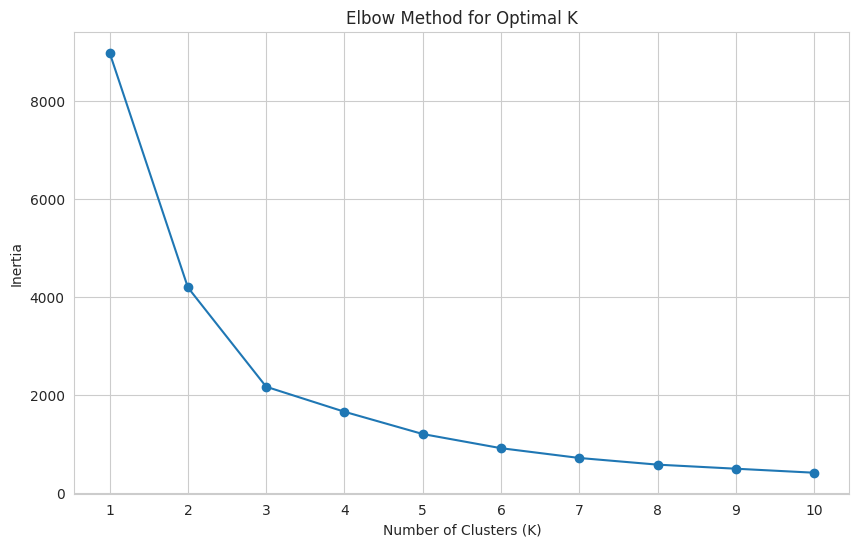

In [ ]:
# Select RFM features for clustering
rfm_features = customer_rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the features
scaler = StandardScaler()
s_rfm = scaler.fit_transform(rfm_features)

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init=10 to suppress warning
    kmeans.fit(s_rfm)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### 5.4 Apply K-Means Clustering and Analyze Cluster Characteristics

In [ ]:
n_clusters = 3 # Chosen based on the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
customer_rfm['RFM_Cluster'] = kmeans.fit_predict(s_rfm)

print("Cluster Characteristics (Mean values for each cluster):")
cluster_characteristics = customer_rfm.groupby('RFM_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
display(cluster_characteristics)

print("\nUpdated customer_rfm DataFrame (first 5 rows with RFM_Cluster):")
display(customer_rfm.head())

print("\nDescriptive Statistics of customer_rfm with RFM_Cluster:")
display(customer_rfm.describe(include='all'))

Cluster Characteristics (Mean values for each cluster):


,Recency,Frequency,Monetary
RFM_Cluster,,,
0,483.142173,4.154952,18.365335
1,3.750000,332.050000,2775.077500
2,106.108603,9.037053,41.585967



Updated customer_rfm DataFrame (first 5 rows with RFM_Cluster):


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score,RFM_Cluster
0,13,174,5,22.65,2,2,2,222,6,2
1,18,52,10,45.20,3,4,4,344,11,2
2,37,19,11,48.60,4,4,4,444,12,2
3,51,29,6,27.55,4,2,3,423,9,2
4,55,58,3,12.40,3,1,1,311,5,2



Descriptive Statistics of customer_rfm with RFM_Cluster:


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score,RFM_Cluster
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.0,2994.0,2994.0,2994,2994.000000,2994.000000
unique,NaN,NaN,NaN,NaN,4.0,4.0,4.0,46,NaN,NaN
top,NaN,NaN,NaN,NaN,4.0,1.0,1.0,111,NaN,NaN
freq,NaN,NaN,NaN,NaN,755.0,908.0,750.0,368,NaN,NaN
mean,15033.152973,184.256847,10.174015,54.990681,NaN,NaN,NaN,NaN,7.328323,1.575150
std,8552.973321,187.015578,29.535508,250.093543,NaN,NaN,NaN,NaN,2.849157,0.814091
min,13.000000,1.000000,1.000000,2.900000,NaN,NaN,NaN,NaN,3.000000,0.000000
25%,7828.000000,45.000000,4.000000,17.650000,NaN,NaN,NaN,NaN,5.000000,2.000000
50%,14970.500000,125.500000,6.000000,25.800000,NaN,NaN,NaN,NaN,7.000000,2.000000
75%,22280.250000,257.000000,8.000000,35.587500,NaN,NaN,NaN,NaN,10.000000,2.000000


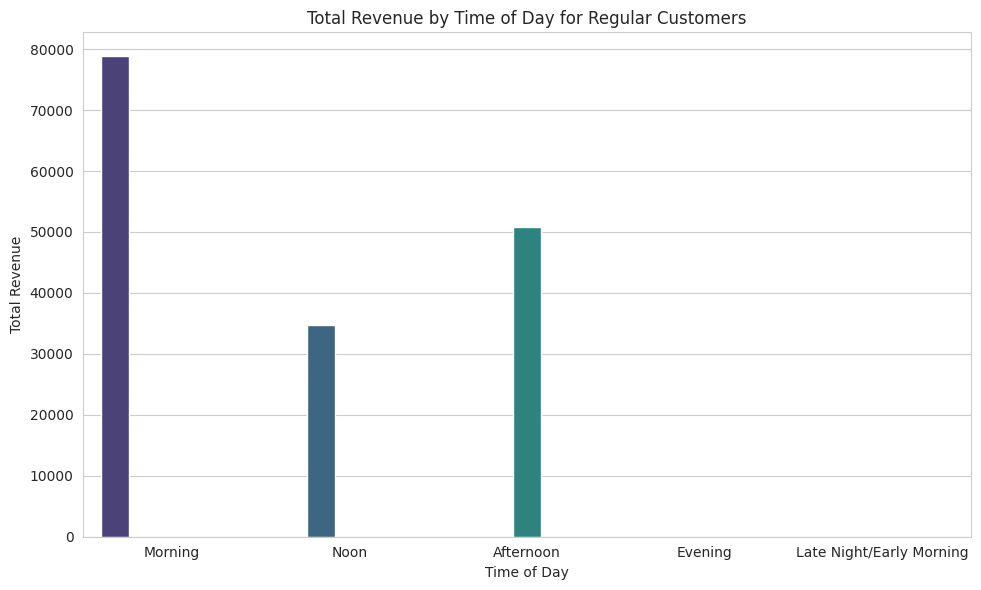

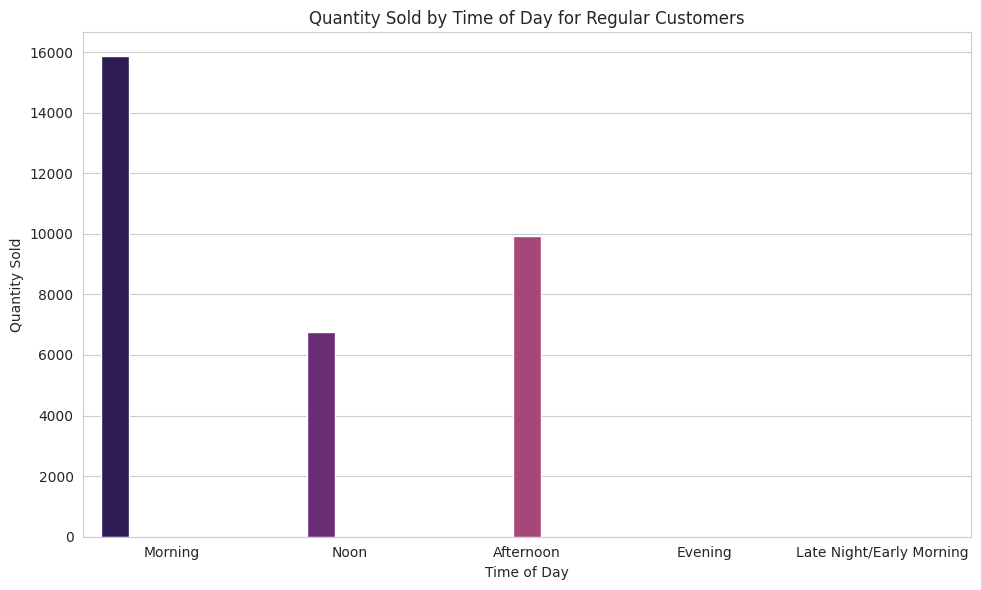

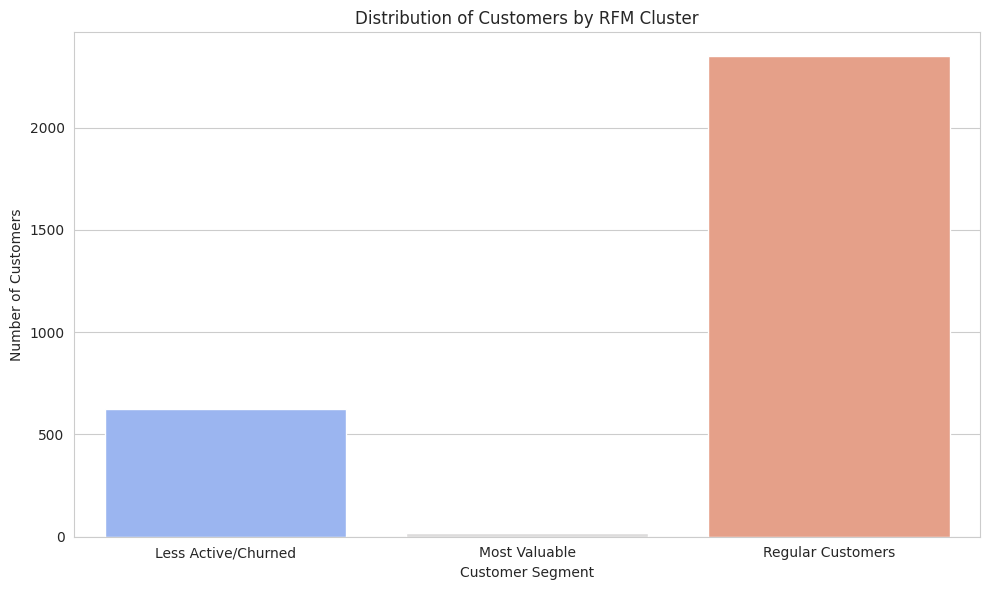

In [ ]:
time_order = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Late Night/Early Morning']
time_of_day_sales['time_of_day'] = pd.Categorical(time_of_day_sales['time_of_day'], categories=time_order, ordered=True)
time_of_day_sales = time_of_day_sales.sort_values('time_of_day')

# Plotting Total Revenue by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='total_revenue', data=time_of_day_sales, palette='viridis', hue='time_of_day', legend=False)
plt.title('Total Revenue by Time of Day for Regular Customers')
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Plotting Quantity Sold by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='quantity_sold', data=time_of_day_sales, palette='magma', hue='time_of_day', legend=False)
plt.title('Quantity Sold by Time of Day for Regular Customers')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

# New Graph: Customer Distribution by RFM Cluster
cluster_counts = customer_rfm['RFM_Cluster'].value_counts().sort_index()
cluster_labels_map = {0: 'Less Active/Churned', 1: 'Most Valuable', 2: 'Regular Customers'}
cluster_counts.index = cluster_counts.index.map(cluster_labels_map)

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='coolwarm', hue=cluster_counts.index, legend=False)
plt.title('Distribution of Customers by RFM Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### 5.5 Identify Regular vs. One-Time Customers

In [ ]:
customer_rfm['Customer_Type'] = customer_rfm['Frequency'].apply(lambda x: 'One-Time' if x == 1 else 'Regular')

# Calculate counts and proportions
customer_type_counts = customer_rfm['Customer_Type'].value_counts()
customer_type_proportions = customer_rfm['Customer_Type'].value_counts(normalize=True) * 100

print("Customer Type Counts:")
display(customer_type_counts)

print("\nCustomer Type Proportions (%):")
display(customer_type_proportions)

print("\nCustomer RFM Data Head with Customer Type:")
display(customer_rfm.head())

Customer Type Counts:


,count
Customer_Type,
Regular,2934
One-Time,60



Customer Type Proportions (%):


,proportion
Customer_Type,
Regular,97.995992
One-Time,2.004008



Customer RFM Data Head with Customer Type:


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score,RFM_Cluster,Customer_Type
0,13,174,5,22.65,2,2,2,222,6,2,Regular
1,18,52,10,45.20,3,4,4,344,11,2,Regular
2,37,19,11,48.60,4,4,4,444,12,2,Regular
3,51,29,6,27.55,4,2,3,423,9,2,Regular
4,55,58,3,12.40,3,1,1,311,5,2,Regular


## 6. Impact of Key Events and Business Goals Evaluation

### 6.1 Analyze Regular Customer Behavior Pre/Post Rebrand

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Filter for 'Regular' customers
regular_customers_rfm = customer_rfm[customer_rfm['Customer_Type'] == 'Regular']

# Merge with merged_data to get transactions of regular customers
regular_customer_transactions = pd.merge(merged_data, regular_customers_rfm[['customer_id', 'Frequency', 'Monetary']], on='customer_id', how='inner')

# Divide regular_customer_transactions into 'before' and 'after' rebrand periods
regular_before_rebrand_data = regular_customer_transactions[regular_customer_transactions['date'] < rebrand_date]
regular_after_rebrand_data = regular_customer_transactions[regular_customer_transactions['date'] >= rebrand_date]

print("--- Regular Customers: Before Rebrand/Reusable Cups ---")
# Calculate metrics for the 'before' period
total_revenue_before = regular_before_rebrand_data['price'].sum()
total_quantity_before = regular_before_rebrand_data['item_name'].count()
unique_customers_before = regular_before_rebrand_data['customer_id'].nunique()
average_frequency_before = regular_customers_rfm['Frequency'].mean() # Overall average frequency for regular customers
average_monetary_before = regular_customers_rfm['Monetary'].mean() # Overall average monetary for regular customers

print(f"Total Revenue: ${total_revenue_before:.2f}")
print(f"Total Quantity Sold: {total_quantity_before}")
print(f"Number of Unique Customers: {unique_customers_before}")
print(f"Average Frequency per Regular Customer: {average_frequency_before:.2f}")
print(f"Average Monetary Value per Regular Customer: ${average_monetary_before:.2f}")

print("\n--- Regular Customers: After Rebrand/Reusable Cups ---")
# Calculate metrics for the 'after' period
total_revenue_after = regular_after_rebrand_data['price'].sum()
total_quantity_after = regular_after_rebrand_data['item_name'].count()
unique_customers_after = regular_after_rebrand_data['customer_id'].nunique()
average_frequency_after = regular_customers_rfm['Frequency'].mean() # Overall average frequency for regular customers
average_monetary_after = regular_customers_rfm['Monetary'].mean() # Overall average monetary for regular customers

print(f"Total Revenue: ${total_revenue_after:.2f}")
print(f"Total Quantity Sold: {total_quantity_after}")
print(f"Number of Unique Customers: {unique_customers_after}")
print(f"Average Frequency per Regular Customer: {average_frequency_after:.2f}")
print(f"Average Monetary Value per Regular Customer: ${average_monetary_after:.2f}")

# Own Cup Usage for Regular Customers
print("\n--- Own Cup Usage for Regular Customers ---")
total_transactions_before_reg = len(regular_before_rebrand_data)
own_cup_transactions_before_reg = regular_before_rebrand_data['own_cup'].sum()
proportion_own_cup_before_reg = (own_cup_transactions_before_reg / total_transactions_before_reg) * 100 if total_transactions_before_reg > 0 else 0
print(f"Proportion of 'own_cup' usage BEFORE {rebrand_date.date()}: {proportion_own_cup_before_reg:.2f}%")

total_transactions_after_reg = len(regular_after_rebrand_data)
own_cup_transactions_after_reg = regular_after_rebrand_data['own_cup'].sum()
proportion_own_cup_after_reg = (own_cup_transactions_after_reg / total_transactions_after_reg) * 100 if total_transactions_after_reg > 0 else 0
print(f"Proportion of 'own_cup' usage AFTER {rebrand_date.date()}: {proportion_own_cup_after_reg:.2f}%")

# Transaction Type Sales for Regular Customers
print("\n--- Transaction Type Sales for Regular Customers ---")
print("Before Rebrand:")
transaction_type_sales_before = regular_before_rebrand_data.groupby('transaction_type').agg(
    total_revenue=('price', 'sum'),
    quantity_sold=('item_name', 'count')
)
display(transaction_type_sales_before)

print("After Rebrand:")
transaction_type_sales_after = regular_after_rebrand_data.groupby('transaction_type').agg(
    total_revenue=('price', 'sum'),
    quantity_sold=('item_name', 'count')
)
display(transaction_type_sales_after)

# Day of Week Sales for Regular Customers
print("\n--- Day of Week Sales for Regular Customers ---")
print("Before Rebrand:")
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_sales_before = regular_before_rebrand_data.groupby(['day_of_week', 'transaction_type']).agg(
    total_revenue=('price', 'sum'),
    quantity_sold=('item_name', 'count')
).reindex(day_of_week_order, level=0).unstack().fillna(0)
display(day_of_week_sales_before)

print("After Rebrand:")
day_of_week_sales_after = regular_after_rebrand_data.groupby(['day_of_week', 'transaction_type']).agg(
    total_revenue=('price', 'sum'),
    quantity_sold=('item_name', 'count')
).reindex(day_of_week_order, level=0).unstack().fillna(0)
display(day_of_week_sales_after)

--- Regular Customers: Before Rebrand/Reusable Cups ---
Total Revenue: $91337.20
Total Quantity Sold: 18791
Number of Unique Customers: 2861
Average Frequency per Regular Customer: 10.36
Average Monetary Value per Regular Customer: $56.03

--- Regular Customers: After Rebrand/Reusable Cups ---
Total Revenue: $73047.25
Total Quantity Sold: 13754
Number of Unique Customers: 2651
Average Frequency per Regular Customer: 10.36
Average Monetary Value per Regular Customer: $56.03

--- Own Cup Usage for Regular Customers ---
Proportion of 'own_cup' usage BEFORE 2023-11-01: 38.07%
Proportion of 'own_cup' usage AFTER 2023-11-01: 44.21%

--- Transaction Type Sales for Regular Customers ---
Before Rebrand:


,total_revenue,quantity_sold
transaction_type,,
Dine-in,27620.6,5741
Takeout,63716.6,13050


After Rebrand:


,total_revenue,quantity_sold
transaction_type,,
Dine-in,30316.55,5627
Takeout,42730.70,8127



--- Day of Week Sales for Regular Customers ---
Before Rebrand:


total_revenue           quantity_sold        
transaction_type       Dine-in   Takeout       Dine-in Takeout
day_of_week                                                   
Monday                 4537.95   9839.25           921    2061
Tuesday                4555.55  10389.85           963    2133
Wednesday              4261.70   9799.95           888    2020
Thursday               4124.15   9883.25           861    1997
Friday                 4395.00   9935.95           913    2038
Saturday               2836.45   6594.50           609    1351
Sunday                 2909.80   7273.85           586    1450

After Rebrand:


total_revenue          quantity_sold        
transaction_type       Dine-in  Takeout       Dine-in Takeout
day_of_week                                                  
Monday                 4477.20  6405.20           828    1208
Tuesday                4571.80  6333.10           839    1193
Wednesday              4246.35  5873.20           791    1127
Thursday               4757.90  5797.80           857    1131
Friday                 4360.25  6450.60           807    1212
Saturday               3968.25  5818.55           755    1098
Sunday                 3934.80  6052.25           750    1158

### 6.2 Analyze Regular Customer Purchasing Patterns by Time of Day

In [ ]:
def categorize_time_of_day(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 13:
        return 'Noon'
    elif 13 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Late Night/Early Morning'

regular_customer_transactions['time_of_day'] = regular_customer_transactions['hour'].apply(categorize_time_of_day)

# Group by 'time_of_day' and calculate total revenue and quantity sold
time_of_day_sales = regular_customer_transactions.groupby('time_of_day').agg(
    total_revenue=('price', 'sum'),
    quantity_sold=('item_name', 'count')
).reset_index()

print("Sales Patterns by Time of Day for Regular Customers:")
display(time_of_day_sales)

Sales Patterns by Time of Day for Regular Customers:


,time_of_day,total_revenue,quantity_sold
0,Afternoon,50888.60,9917
1,Morning,78818.80,15860
2,Noon,34677.05,6768


### 6.3 Evaluate Waste Reduction (Own Cup Usage) Goal

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Calculate own_cup usage before rebrand_date
before_rebrand_transactions = merged_data[merged_data['date'] < rebrand_date]
total_transactions_before = len(before_rebrand_transactions)
own_cup_transactions_before = before_rebrand_transactions['own_cup'].sum()
proportion_own_cup_before = (own_cup_transactions_before / total_transactions_before) * 100 if total_transactions_before > 0 else 0

# Calculate own_cup usage after rebrand_date
after_rebrand_transactions = merged_data[merged_data['date'] >= rebrand_date]
total_transactions_after = len(after_rebrand_transactions)
own_cup_transactions_after = after_rebrand_transactions['own_cup'].sum()
proportion_own_cup_after = (own_cup_transactions_after / total_transactions_after) * 100 if total_transactions_after > 0 else 0

print(f"Proportion of 'own_cup' usage before {rebrand_date.date()}: {proportion_own_cup_before:.2f}%")
print(f"Proportion of 'own_cup' usage after {rebrand_date.date()}: {proportion_own_cup_after:.2f}%")

Proportion of 'own_cup' usage before 2023-11-01: 38.08%
Proportion of 'own_cup' usage after 2023-11-01: 44.25%


### 6.4 Evaluate New Revenue Streams (Merchandise Sales) Goal

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Identify Merchandise items
merchandise_item_names = items_data[items_data['item_type'] == 'Merchandise']['item_name'].tolist()

# Filter transactions for merchandise items
merchandise_transactions_before = merged_data[(merged_data['date'] < rebrand_date) & (merged_data['item_name'].isin(merchandise_item_names))]
merchandise_transactions_after = merged_data[(merged_data['date'] >= rebrand_date) & (merged_data['item_name'].isin(merchandise_item_names))]

# Calculate metrics for merchandise before rebrand
total_merchandise_revenue_before = merchandise_transactions_before['price'].sum()
total_merchandise_quantity_before = merchandise_transactions_before['item_name'].count()

# Calculate metrics for merchandise after rebrand
total_merchandise_revenue_after = merchandise_transactions_after['price'].sum()
total_merchandise_quantity_after = merchandise_transactions_after['item_name'].count()

print(f"\nMerchandise Sales before {rebrand_date.date()}:")
print(f"  Total Revenue: ${total_merchandise_revenue_before:.2f}")
print(f"  Quantity Sold: {total_merchandise_quantity_before}")

print(f"\nMerchandise Sales after {rebrand_date.date()}:")
print(f"  Total Revenue: ${total_merchandise_revenue_after:.2f}")
print(f"  Quantity Sold: {total_merchandise_quantity_after}")


Merchandise Sales before 2023-11-01:
  Total Revenue: $13569.00
  Quantity Sold: 891

Merchandise Sales after 2023-11-01:
  Total Revenue: $18771.00
  Quantity Sold: 1253


### 6.5 Analyze Overall Profit Margins by Period

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

# 1. Pre-Construction Period (before 2022-09-04)
pre_construction_data = merged_data[merged_data['date'] < construction_start]
total_revenue_pre_construction = pre_construction_data['price'].sum()
total_cost_pre_construction = pre_construction_data['production_cost'].sum()
profit_margin_pre_construction = ((total_revenue_pre_construction - total_cost_pre_construction) / total_revenue_pre_construction) * 100 if total_revenue_pre_construction > 0 else 0

# 2. During Construction Period (2022-09-04 to 2022-12-12)
during_construction_data = merged_data[
    (merged_data['date'] >= construction_start) &
    (merged_data['date'] <= construction_end)
]
total_revenue_during_construction = during_construction_data['price'].sum()
total_cost_during_construction = during_construction_data['production_cost'].sum()
profit_margin_during_construction = ((total_revenue_during_construction - total_cost_during_construction) / total_revenue_during_construction) * 100 if total_revenue_during_construction > 0 else 0

# 3. Post-Construction, Pre-Rebranding Period (after 2022-12-12 and before 2023-11-01)
post_construction_pre_rebrand_data = merged_data[
    (merged_data['date'] > construction_end) &
    (merged_data['date'] < rebrand_date)
]
total_revenue_post_construction_pre_rebrand = post_construction_pre_rebrand_data['price'].sum()
total_cost_post_construction_pre_rebrand = post_construction_pre_rebrand_data['production_cost'].sum()
profit_margin_post_construction_pre_rebrand = ((total_revenue_post_construction_pre_rebrand - total_cost_post_construction_pre_rebrand) / total_revenue_post_construction_pre_rebrand) * 100 if total_revenue_post_construction_pre_rebrand > 0 else 0

# 4. Post-Rebranding Period (on or after 2023-11-01)
post_rebrand_data = merged_data[merged_data['date'] >= rebrand_date]
total_revenue_post_rebrand_overall = post_rebrand_data['price'].sum()
total_cost_post_rebrand_overall = post_rebrand_data['production_cost'].sum()
profit_margin_post_rebrand_overall = ((total_revenue_post_rebrand_overall - total_cost_post_rebrand_overall) / total_revenue_post_rebrand_overall) * 100 if total_revenue_post_rebrand_overall > 0 else 0

print("Profit Margins by Period:")
print(f"  Pre-Construction (< {construction_start.date()}): {profit_margin_pre_construction:.2f}%")
print(f"  During Construction ({construction_start.date()} - {construction_end.date()}): {profit_margin_during_construction:.2f}%")
print(f"  Post-Construction/Pre-Rebrand (> {construction_end.date()} & < {rebrand_date.date()}): {profit_margin_post_construction_pre_rebrand:.2f}%")
print(f"  Post-Rebranding (>= {rebrand_date.date()}): {profit_margin_post_rebrand_overall:.2f}%")

Profit Margins by Period:
  Pre-Construction (< 2022-09-04): 70.87%
  During Construction (2022-09-04 - 2022-12-12): 70.94%
  Post-Construction/Pre-Rebrand (> 2022-12-12 & < 2023-11-01): 70.90%
  Post-Rebranding (>= 2023-11-01): 69.58%


### 6.6 Analyze Sales Mix and Profit Margins by Item Type (Before/After Rebrand)

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Calculate item-level profit margin for merged_data
merged_data['item_profit_margin'] = ((merged_data['price'] - merged_data['production_cost']) / merged_data['price']) * 100

# Separate data into before and after rebrand periods
before_rebrand = merged_data[merged_data['date'] < rebrand_date]
after_rebrand = merged_data[merged_data['date'] >= rebrand_date]

print("--- Analysis of Sales Mix and Profit Margins Before Rebrand ---")
sales_mix_before = before_rebrand.groupby('item_type').agg(
    total_revenue=('price', 'sum'),
    average_profit_margin=('item_profit_margin', 'mean'),
    total_quantity=('item_name', 'count')
).reset_index()
sales_mix_before['revenue_percentage'] = (sales_mix_before['total_revenue'] / sales_mix_before['total_revenue'].sum()) * 100
display(sales_mix_before)

print("\n--- Analysis of Sales Mix and Profit Margins After Rebrand ---")
sales_mix_after = after_rebrand.groupby('item_type').agg(
    total_revenue=('price', 'sum'),
    average_profit_margin=('item_profit_margin', 'mean'),
    total_quantity=('item_name', 'count')
).reset_index()
sales_mix_after['revenue_percentage'] = (sales_mix_after['total_revenue'] / sales_mix_after['total_revenue'].sum()) * 100
display(sales_mix_after)

--- Analysis of Sales Mix and Profit Margins Before Rebrand ---


,item_type,total_revenue,average_profit_margin,total_quantity,revenue_percentage
0,Drink,77908.2,73.592327,17933,85.166796
1,Merchandise,13569.0,60.326724,891,14.833204



--- Analysis of Sales Mix and Profit Margins After Rebrand ---


,item_type,total_revenue,average_profit_margin,total_quantity,revenue_percentage
0,Drink,54393.9,73.612531,12528,74.344255
1,Merchandise,18771.0,60.757294,1253,25.655745


### 6.7 Analyze Takeout and Dine-in Drink Profit Margins Pre/Post Rebrand

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

drink_transactions = merged_data[
    (merged_data['item_type'] == 'Drink') &
    (merged_data['transaction_type'].isin(['Dine-in', 'Takeout']))
].copy()

# Apply the 50-cent surcharge to the price for takeout drinks post-rebrand where surcharge is True
drink_transactions['adjusted_price'] = drink_transactions['price']
drink_transactions.loc[
    (drink_transactions['surcharge'] == True) &
    (drink_transactions['transaction_type'] == 'Takeout') &
    (drink_transactions['date'] >= rebrand_date),
    'adjusted_price'
] += 0.50

drink_transactions_before_rebrand = drink_transactions[drink_transactions['date'] < rebrand_date].copy()
drink_transactions_after_rebrand = drink_transactions[drink_transactions['date'] >= rebrand_date].copy()

before_rebrand_margins = drink_transactions_before_rebrand.groupby('transaction_type').agg(
    total_revenue=('adjusted_price', 'sum'),
    total_production_cost=('production_cost', 'sum')
).reset_index()
before_rebrand_margins['profit_margin'] = ((before_rebrand_margins['total_revenue'] - before_rebrand_margins['total_production_cost']) / before_rebrand_margins['total_revenue']) * 100

after_rebrand_margins = drink_transactions_after_rebrand.groupby('transaction_type').agg(
    total_revenue=('adjusted_price', 'sum'),
    total_production_cost=('production_cost', 'sum')
).reset_index()
after_rebrand_margins['profit_margin'] = ((after_rebrand_margins['total_revenue'] - after_rebrand_margins['total_production_cost']) / after_rebrand_margins['total_revenue']) * 100

profit_margin_comparison = pd.DataFrame(
    columns=['Period', 'Transaction Type', 'Profit Margin (%)']
)

for index, row in before_rebrand_margins.iterrows():
    profit_margin_comparison.loc[len(profit_margin_comparison)] = ['Before Rebrand', row['transaction_type'], row['profit_margin']]

for index, row in after_rebrand_margins.iterrows():
    profit_margin_comparison.loc[len(profit_margin_comparison)] = ['After Rebrand', row['transaction_type'], row['profit_margin']]

print("Profit Margins for Takeout and Dine-in Drinks Before and After Rebrand (with 50-cent surcharge accounted for):")
display(profit_margin_comparison)

Profit Margins for Takeout and Dine-in Drinks Before and After Rebrand (with 50-cent surcharge accounted for):


,Period,Transaction Type,Profit Margin (%)
0,Before Rebrand,Dine-in,72.840258
1,Before Rebrand,Takeout,72.871539
2,After Rebrand,Dine-in,72.830733
3,After Rebrand,Takeout,74.277270


### 6.8 Investigate New Customer Acquisition Post-Rebrand

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Determine the first purchase date for each unique customer_id
first_purchase_dates = merged_data.groupby('customer_id')['date'].min().reset_index()
first_purchase_dates.rename(columns={'date': 'first_purchase_date'}, inplace=True)

# Identify customers whose first purchase date is on or after the rebrand_date
new_customers_ids = first_purchase_dates[first_purchase_dates['first_purchase_date'] >= rebrand_date]['customer_id'].tolist()

# Filter merged_data for transactions made by these new customers AFTER the rebrand date
new_customer_transactions_post_rebrand = merged_data[
    (merged_data['customer_id'].isin(new_customers_ids)) &
    (merged_data['date'] >= rebrand_date)
]

# Calculate the total revenue and total quantity sold attributed to these new customers
total_revenue_new_customers = new_customer_transactions_post_rebrand['price'].sum()
total_quantity_new_customers = new_customer_transactions_post_rebrand['item_name'].count()

print("--- New Customer Acquisition Post-Rebrand ---")
print(f"Number of new customers acquired post-rebrand: {len(new_customers_ids)}")
print(f"Total revenue generated by new customers post-rebrand: ${total_revenue_new_customers:.2f}")
print(f"Total quantity sold to new customers post-rebrand: {total_quantity_new_customers}")

# Compare with overall total revenue and quantity sold in the same post-rebrand period
overall_after_rebrand_data = merged_data[merged_data['date'] >= rebrand_date]
overall_total_revenue_post_rebrand = overall_after_rebrand_data['price'].sum()
overall_total_quantity_post_rebrand = overall_after_rebrand_data['item_name'].count()

revenue_contribution_percentage = (total_revenue_new_customers / overall_total_revenue_post_rebrand) * 100 if overall_total_revenue_post_rebrand > 0 else 0
quantity_contribution_percentage = (total_quantity_new_customers / overall_total_quantity_post_rebrand) * 100 if overall_total_quantity_post_rebrand > 0 else 0

print(f"Overall total revenue post-rebrand: ${overall_total_revenue_post_rebrand:.2f}")
print(f"Overall total quantity sold post-rebrand: {overall_total_quantity_post_rebrand}")
print(f"New customers contributed {revenue_contribution_percentage:.2f}% of total revenue post-rebrand.")
print(f"New customers contributed {quantity_contribution_percentage:.2f}% of total quantity sold post-rebrand.")

--- New Customer Acquisition Post-Rebrand ---
Number of new customers acquired post-rebrand: 100
Total revenue generated by new customers post-rebrand: $1158.45
Total quantity sold to new customers post-rebrand: 267
Overall total revenue post-rebrand: $73164.90
Overall total quantity sold post-rebrand: 13781
New customers contributed 1.58% of total revenue post-rebrand.
New customers contributed 1.94% of total quantity sold post-rebrand.


## 7. Predictive Trend Analysis

### 7.1 Prepare Data for Linear Regression

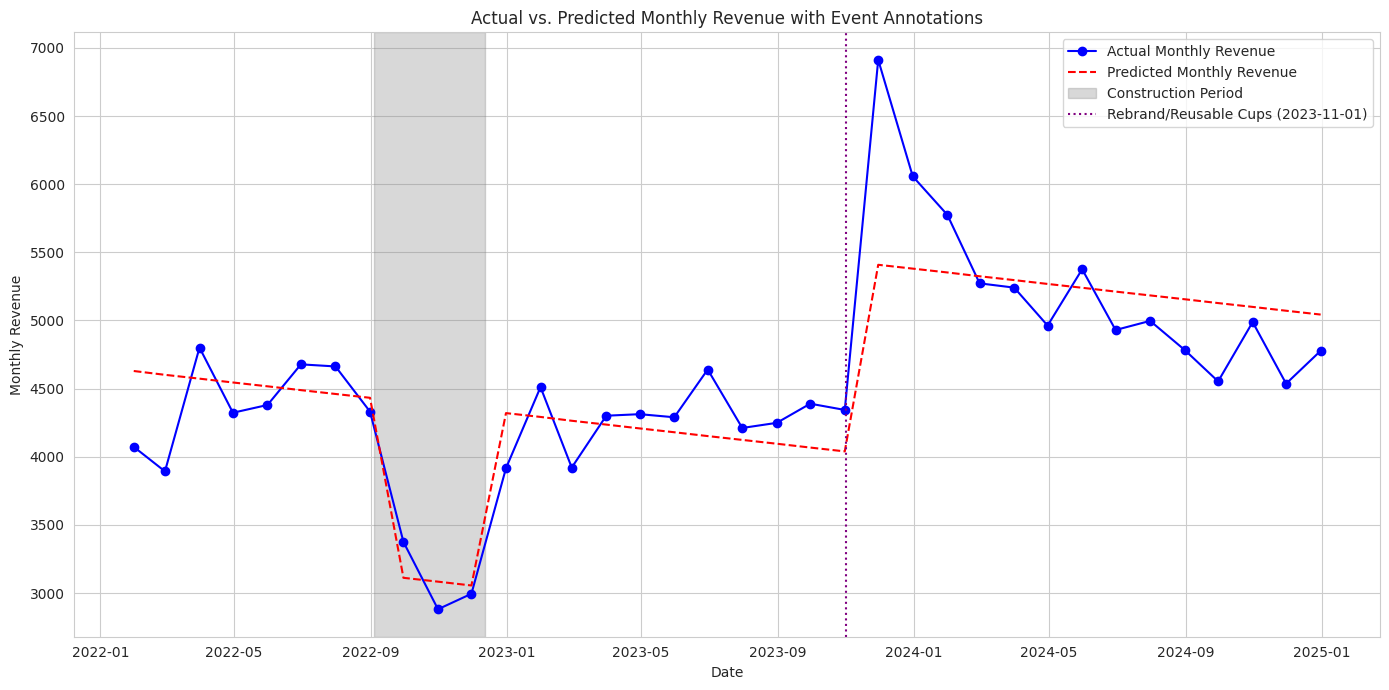

In [ ]:
monthly_data['predicted_revenue'] = model.predict(X)

plt.figure(figsize=(14, 7))
plt.plot(monthly_data['date'], monthly_data['monthly_revenue'], label='Actual Monthly Revenue', marker='o', linestyle='-', color='blue')
plt.plot(monthly_data['date'], monthly_data['predicted_revenue'], label='Predicted Monthly Revenue', linestyle='--', color='red')

# Add annotations for significant dates
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle=':', label='Rebrand/Reusable Cups (2023-11-01)')

plt.title('Actual vs. Predicted Monthly Revenue with Event Annotations')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

# Create a new DataFrame for monthly revenue prediction
monthly_data = monthly_revenue.reset_index()
monthly_data.columns = ['date', 'monthly_revenue']

# Create a numerical 'time_index' starting from 0
monthly_data['time_index'] = range(len(monthly_data))

# Create 'construction_period' dummy variable
monthly_data['construction_period'] = ((monthly_data['date'] >= construction_start) & (monthly_data['date'] <= construction_end)).astype(int)

# Create 'rebrand_event' dummy variable
monthly_data['rebrand_event'] = (monthly_data['date'] >= rebrand_date).astype(int)

print("Prepared Monthly Data for Regression Head:")
display(monthly_data.head())
print("\nPrepared Monthly Data Info:")
monthly_data.info()

Prepared Monthly Data for Regression Head:


,date,monthly_revenue,time_index,construction_period,rebrand_event
0,2022-01-31,4072.95,0,0,0
1,2022-02-28,3892.85,1,0,0
2,2022-03-31,4800.95,2,0,0
3,2022-04-30,4322.95,3,0,0
4,2022-05-31,4380.00,4,0,0



Prepared Monthly Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 36 non-null     datetime64[ns]
 1   monthly_revenue      36 non-null     float64       
 2   time_index           36 non-null     int64         
 3   construction_period  36 non-null     int64         
 4   rebrand_event        36 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.5 KB


### 7.2 Fit Linear Regression Model and Evaluate

In [ ]:
X = monthly_data[['time_index', 'construction_period', 'rebrand_event']]
y = monthly_data['monthly_revenue']

model = LinearRegression()
model.fit(X, y)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

r_squared = model.score(X, y)
print("R-squared Score:", r_squared)

Model Coefficients: [  -28.0915232  -1292.99229469  1397.34002684]
Model Intercept: 4629.332670190726
R-squared Score: 0.7119202922331562


## 8. Visualizations

### 8.1 Top 10 Items by Quantity and Revenue

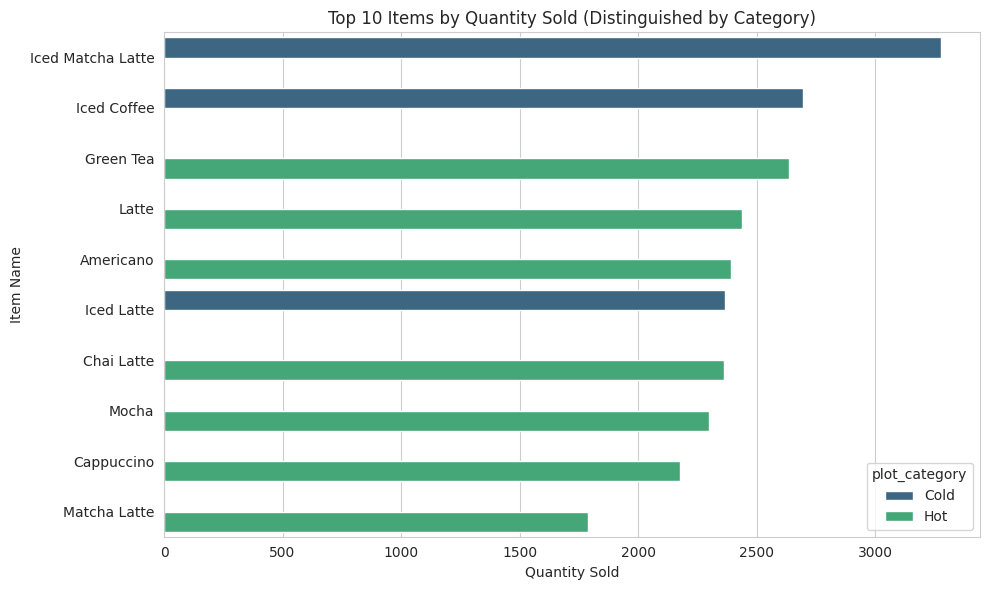

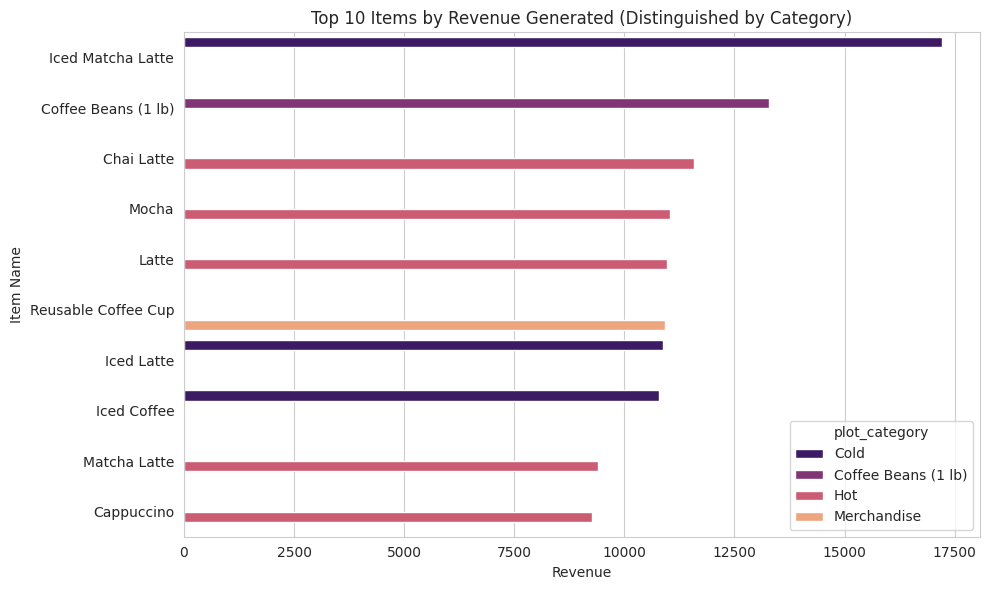

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

# Prepare data for Top 10 Items by Quantity Sold, distinguishing hot/cold drinks and specific merchandise
top_10_quantity_items = item_quantity_sold.head(10).index
filtered_quantity_data_all = merged_data[merged_data['item_name'].isin(top_10_quantity_items)].copy()

# Create a 'plot_category' for hue
filtered_quantity_data_all['plot_category'] = filtered_quantity_data_all['drink_temperature'].fillna('Merchandise')
filtered_quantity_data_all.loc[filtered_quantity_data_all['item_name'] == 'Coffee Beans (1 lb)', 'plot_category'] = 'Coffee Beans (1 lb)'

grouped_quantity_data = filtered_quantity_data_all.groupby(['item_name', 'plot_category']).size().reset_index(name='quantity_sold')
grouped_quantity_data['item_name'] = pd.Categorical(grouped_quantity_data['item_name'], categories=top_10_quantity_items, ordered=True)
grouped_quantity_data = grouped_quantity_data.sort_values('item_name')

plt.figure(figsize=(10, 6))
sns.barplot(x='quantity_sold', y='item_name', hue='plot_category', data=grouped_quantity_data, palette='viridis', dodge=True)
plt.title('Top 10 Items by Quantity Sold (Distinguished by Category)')
plt.xlabel('Quantity Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

# Prepare data for Top 10 Items by Revenue Generated, distinguishing hot/cold drinks and specific merchandise
top_10_revenue_items = item_revenue.nlargest(10).index
filtered_revenue_data = merged_data[merged_data['item_name'].isin(top_10_revenue_items)].copy()

# Create a 'plot_category' for hue
filtered_revenue_data['plot_category'] = filtered_revenue_data['drink_temperature'].fillna('Merchandise')
filtered_revenue_data.loc[filtered_revenue_data['item_name'] == 'Coffee Beans (1 lb)', 'plot_category'] = 'Coffee Beans (1 lb)'

grouped_revenue_data = filtered_revenue_data.groupby(['item_name', 'plot_category'])['price'].sum().reset_index()
grouped_revenue_data['item_name'] = pd.Categorical(grouped_revenue_data['item_name'], categories=top_10_revenue_items, ordered=True)
grouped_revenue_data = grouped_revenue_data.sort_values('item_name')

plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='item_name', hue='plot_category', data=grouped_revenue_data, palette='magma', dodge=True)
plt.title('Top 10 Items by Revenue Generated (Distinguished by Category)')
plt.xlabel('Revenue')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

### 8.2 Daily Revenue Trend

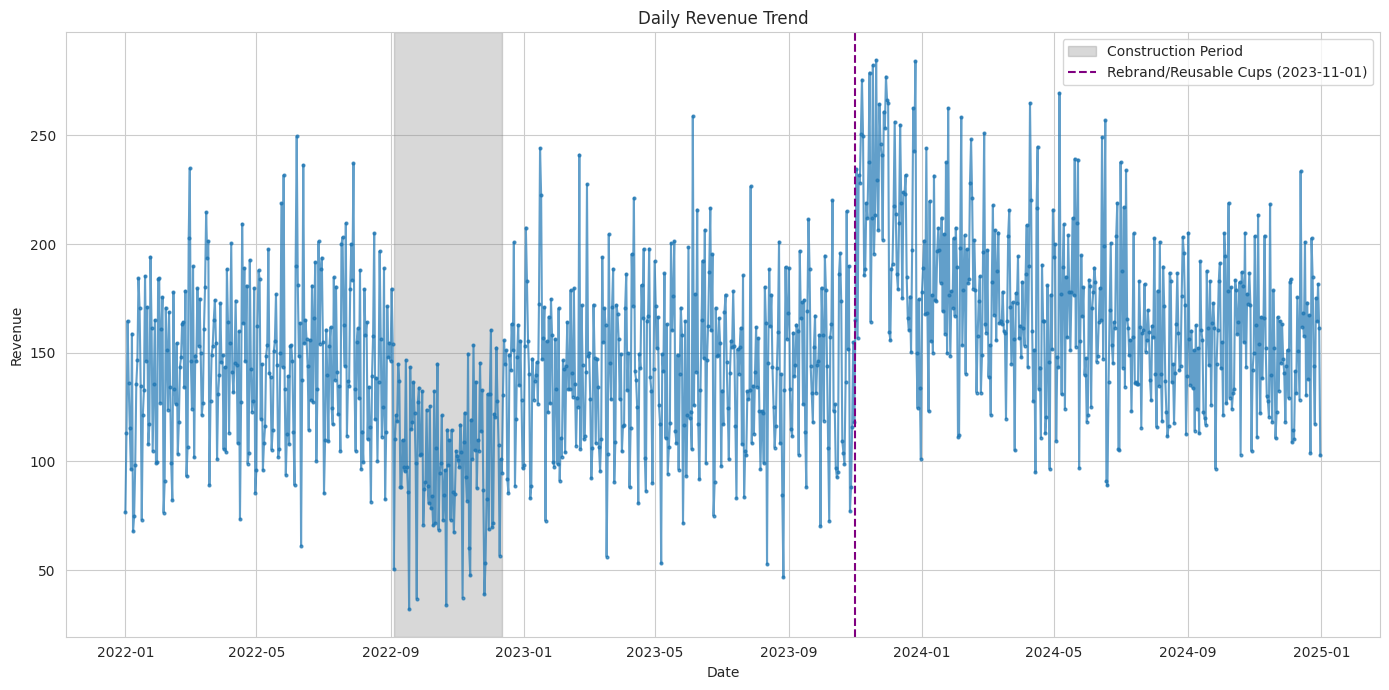

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

plt.figure(figsize=(14, 7))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)

plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend()
plt.tight_layout()
plt.show()

### 8.3 Monthly Revenue Trends: Total, Drinks, Merchandise, Hot/Cold, Dine-in/Takeout

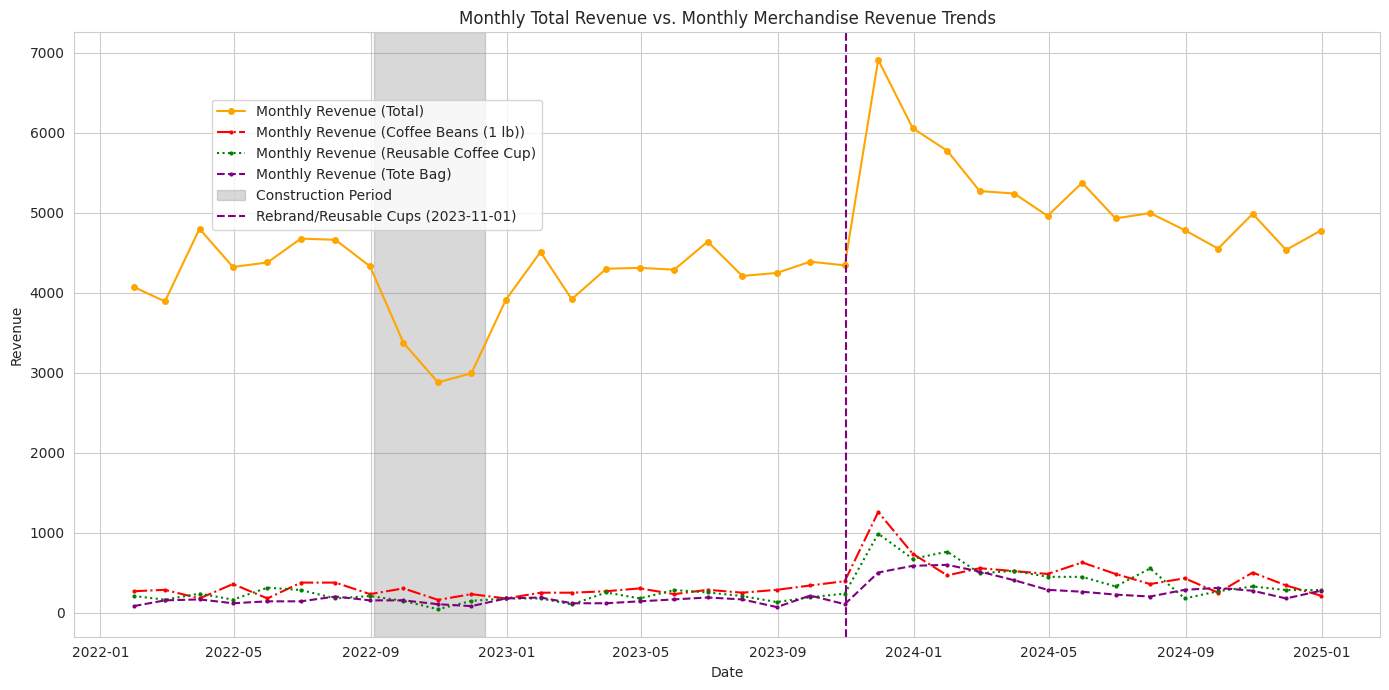

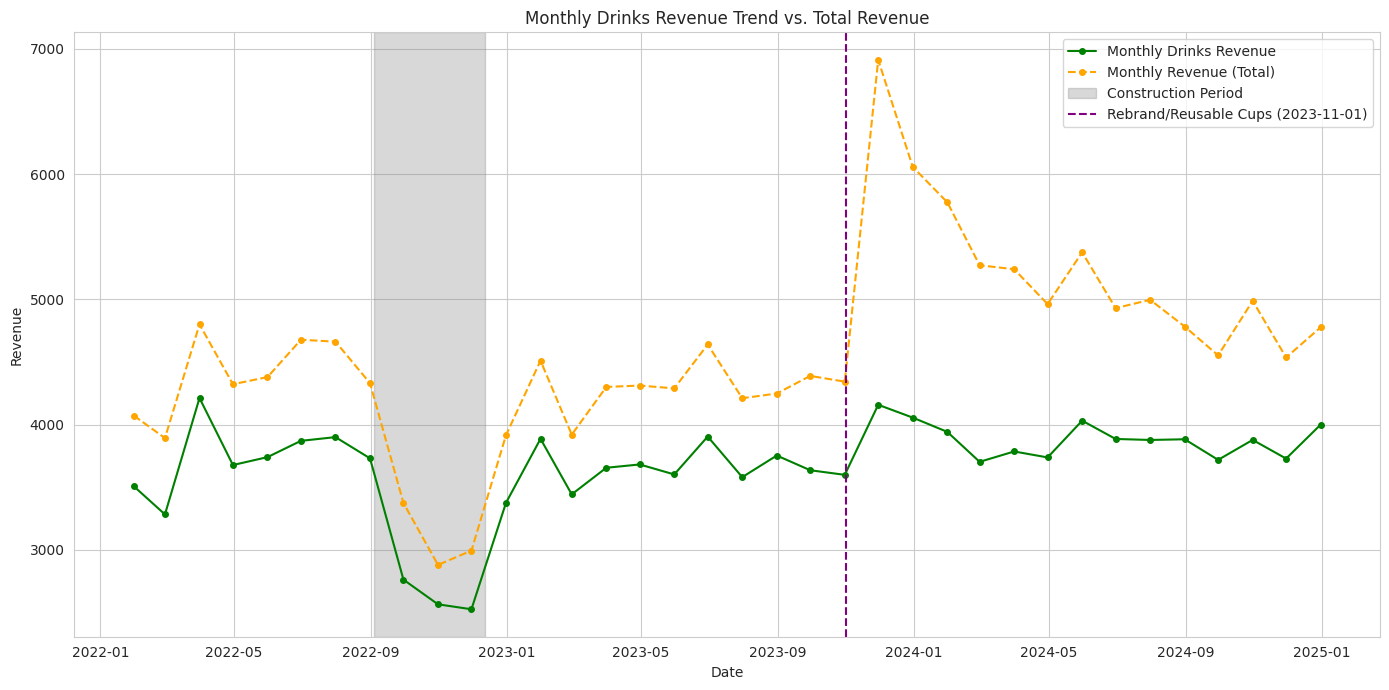

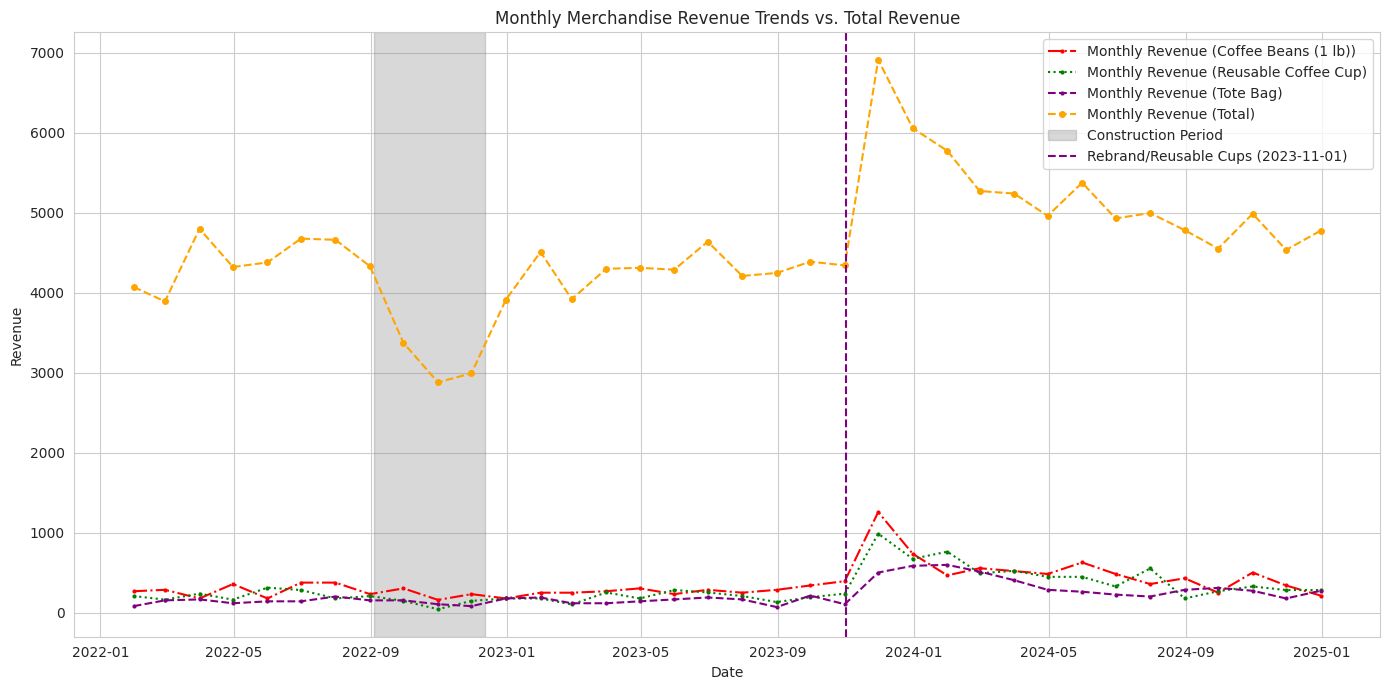

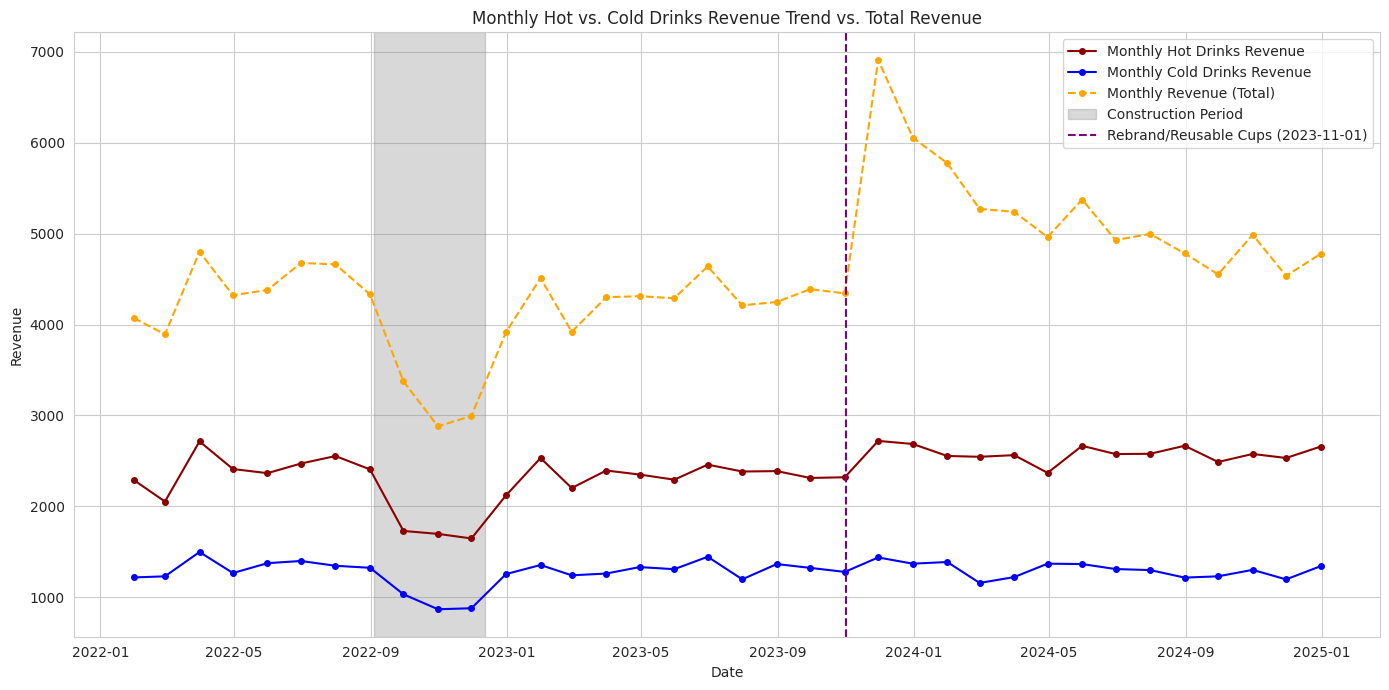

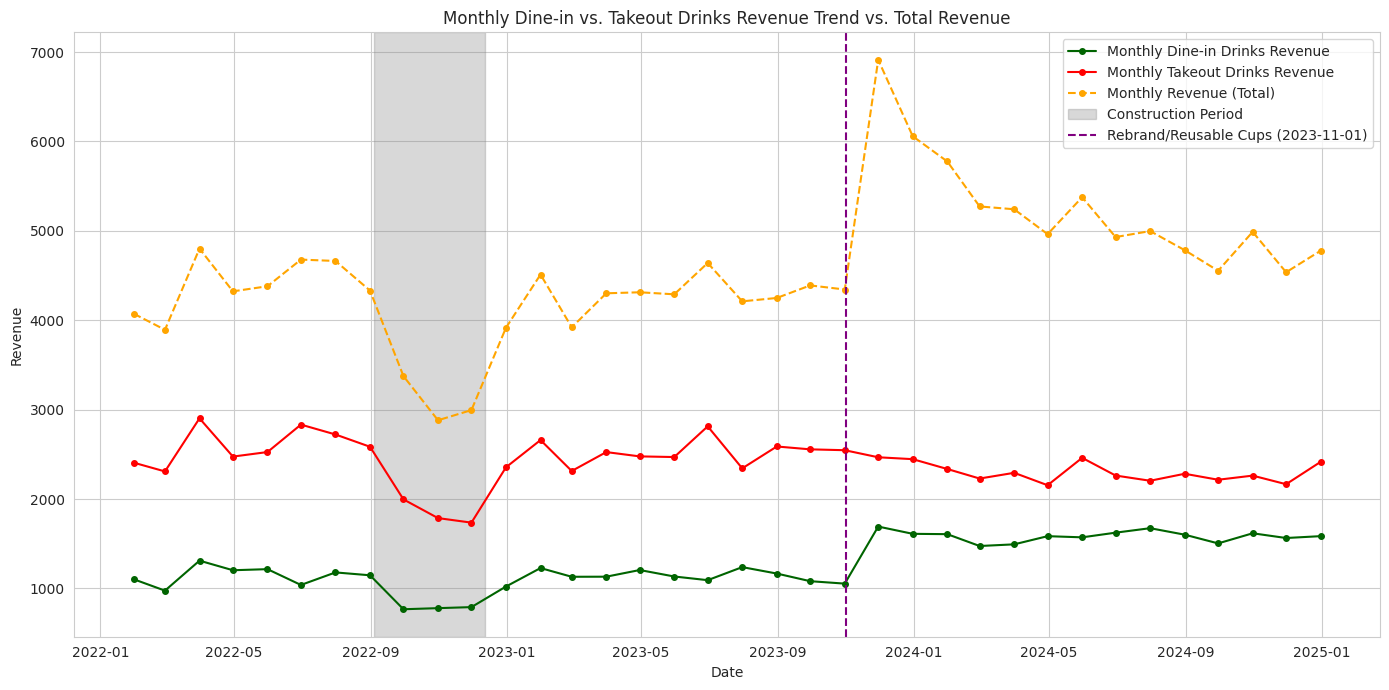

In [ ]:
merchandise_items = ['Coffee Beans (1 lb)', 'Reusable Coffee Cup', 'Tote Bag']
monthly_merchandise_revenue = {}
for item in merchandise_items:
    monthly_merchandise_revenue[item] = merged_data[merged_data['item_name'] == item].groupby('date')['price'].sum().resample('ME').sum()

monthly_drinks_revenue = merged_data[merged_data['item_type'] == 'Drink'].groupby('date')['price'].sum().resample('ME').sum()

monthly_hot_drinks_revenue = merged_data[(merged_data['item_type'] == 'Drink') & (merged_data['drink_temperature'] == 'Hot')].groupby('date')['price'].sum().resample('ME').sum()
monthly_cold_drinks_revenue = merged_data[(merged_data['item_type'] == 'Drink') & (merged_data['drink_temperature'] == 'Cold')].groupby('date')['price'].sum().resample('ME').sum()

monthly_dine_in_drinks_revenue = merged_data[(merged_data['item_type'] == 'Drink') & (merged_data['transaction_type'] == 'Dine-in')].groupby('date')['price'].sum().resample('ME').sum()
monthly_takeout_drinks_revenue = merged_data[(merged_data['item_type'] == 'Drink') & (merged_data['transaction_type'] == 'Takeout')].groupby('date')['price'].sum().resample('ME').sum()

colors = ['red', 'green', 'purple'] # Define colors and linestyles here
linestyles = ['-.', ':', '--']

# Original Combined Monthly Revenue Graph (Total Revenue and Merchandise Revenue Trends)
fig1, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', markersize=4, color='orange', label='Monthly Revenue (Total)')
for i, item in enumerate(merchandise_items):
    ax1.plot(monthly_merchandise_revenue[item].index, monthly_merchandise_revenue[item].values,
             marker='.', linestyle=linestyles[i], markersize=4, color=colors[i], label=f'Monthly Revenue ({item})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='y')
ax1.grid(True)
ax1.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
ax1.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.title('Monthly Total Revenue vs. Monthly Merchandise Revenue Trends')
fig1.tight_layout()
ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Monthly Drinks Revenue Trend (including Total Revenue)
plt.figure(figsize=(14, 7))
plt.plot(monthly_drinks_revenue.index, monthly_drinks_revenue.values, marker='o', linestyle='-', markersize=4, color='green', label='Monthly Drinks Revenue')
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='--', markersize=4, color='orange', label='Monthly Revenue (Total)') # Add total revenue
plt.title('Monthly Drinks Revenue Trend vs. Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend()
plt.tight_layout()
plt.show()

# Monthly Merchandise Revenue Trends (separated, including Total Revenue)
plt.figure(figsize=(14, 7))
colors = ['red', 'green', 'purple'] # Reuse colors
linestyles = ['-.', ':', '--']
for i, item in enumerate(merchandise_items):
    plt.plot(monthly_merchandise_revenue[item].index, monthly_merchandise_revenue[item].values,
             marker='.', linestyle=linestyles[i], markersize=4, color=colors[i], label=f'Monthly Revenue ({item})')
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='--', markersize=4, color='orange', label='Monthly Revenue (Total)') # Add total revenue
plt.title('Monthly Merchandise Revenue Trends vs. Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend()
plt.tight_layout()
plt.show()

# Monthly Hot vs. Cold Drinks Revenue Trend (including Total Revenue)
plt.figure(figsize=(14, 7))
plt.plot(monthly_hot_drinks_revenue.index, monthly_hot_drinks_revenue.values, marker='o', linestyle='-', markersize=4, color='darkred', label='Monthly Hot Drinks Revenue')
plt.plot(monthly_cold_drinks_revenue.index, monthly_cold_drinks_revenue.values, marker='o', linestyle='-', markersize=4, color='blue', label='Monthly Cold Drinks Revenue')
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='--', markersize=4, color='orange', label='Monthly Revenue (Total)') # Add total revenue
plt.title('Monthly Hot vs. Cold Drinks Revenue Trend vs. Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend()
plt.tight_layout()
plt.show()

# Monthly Dine-in vs. Takeout Drinks Revenue Trend (including Total Revenue)
plt.figure(figsize=(14, 7))
plt.plot(monthly_dine_in_drinks_revenue.index, monthly_dine_in_drinks_revenue.values, marker='o', linestyle='-', markersize=4, color='darkgreen', label='Monthly Dine-in Drinks Revenue')
plt.plot(monthly_takeout_drinks_revenue.index, monthly_takeout_drinks_revenue.values, marker='o', linestyle='-', markersize=4, color='red', label='Monthly Takeout Drinks Revenue')
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='--', markersize=4, color='orange', label='Monthly Revenue (Total)') # Add total revenue
plt.title('Monthly Dine-in vs. Takeout Drinks Revenue Trend vs. Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend()
plt.tight_layout()
plt.show()

### 8.4 Production Cost & Cost-to-Price Ratio Visualizations

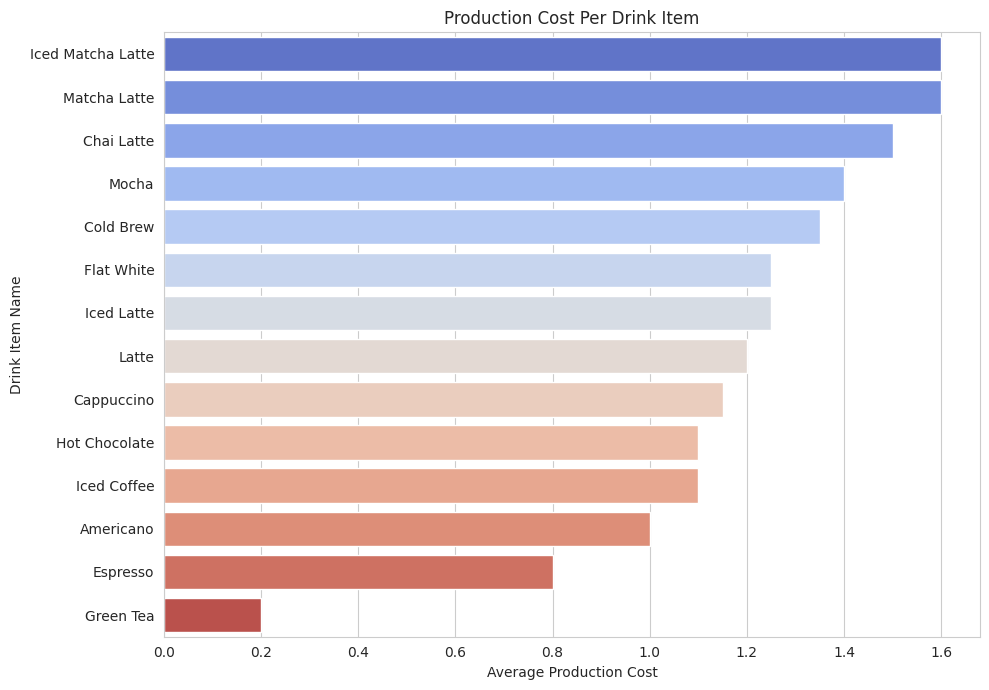

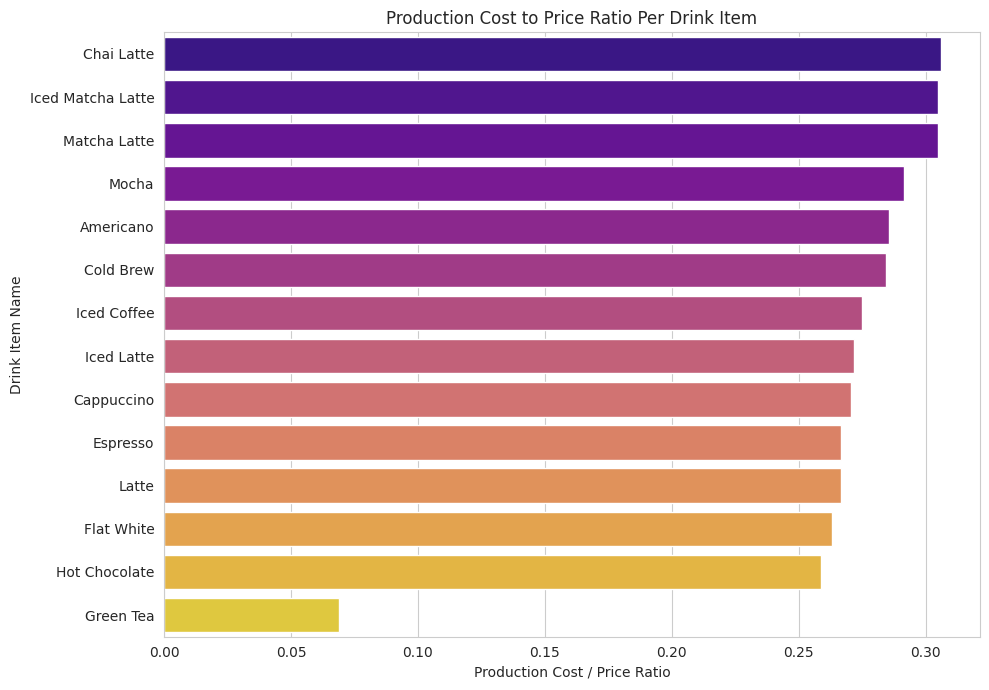

In [ ]:
# Production Cost Per Drink
drink_production_cost = items_data[items_data['item_type'] == 'Drink'].groupby('item_name')['production_cost'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='production_cost', y='item_name', data=drink_production_cost, palette='coolwarm', hue='item_name', legend=False)
plt.title('Production Cost Per Drink Item')
plt.xlabel('Average Production Cost')
plt.ylabel('Drink Item Name')
plt.tight_layout()
plt.show()

# Production Cost to Price Ratio Per Drink
drink_cost_price_ratio = items_data[items_data['item_type'] == 'Drink'].copy()
drink_cost_price_ratio['cost_price_ratio'] = drink_cost_price_ratio['production_cost'] / drink_cost_price_ratio['price']
drink_cost_price_ratio = drink_cost_price_ratio.sort_values(by='cost_price_ratio', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='cost_price_ratio', y='item_name', data=drink_cost_price_ratio, palette='plasma', hue='item_name', legend=False)
plt.title('Production Cost to Price Ratio Per Drink Item')
plt.xlabel('Production Cost / Price Ratio')
plt.ylabel('Drink Item Name')
plt.tight_layout()
plt.show()

### 8.5 Monthly Revenue by RFM Cluster vs. Total Monthly Revenue

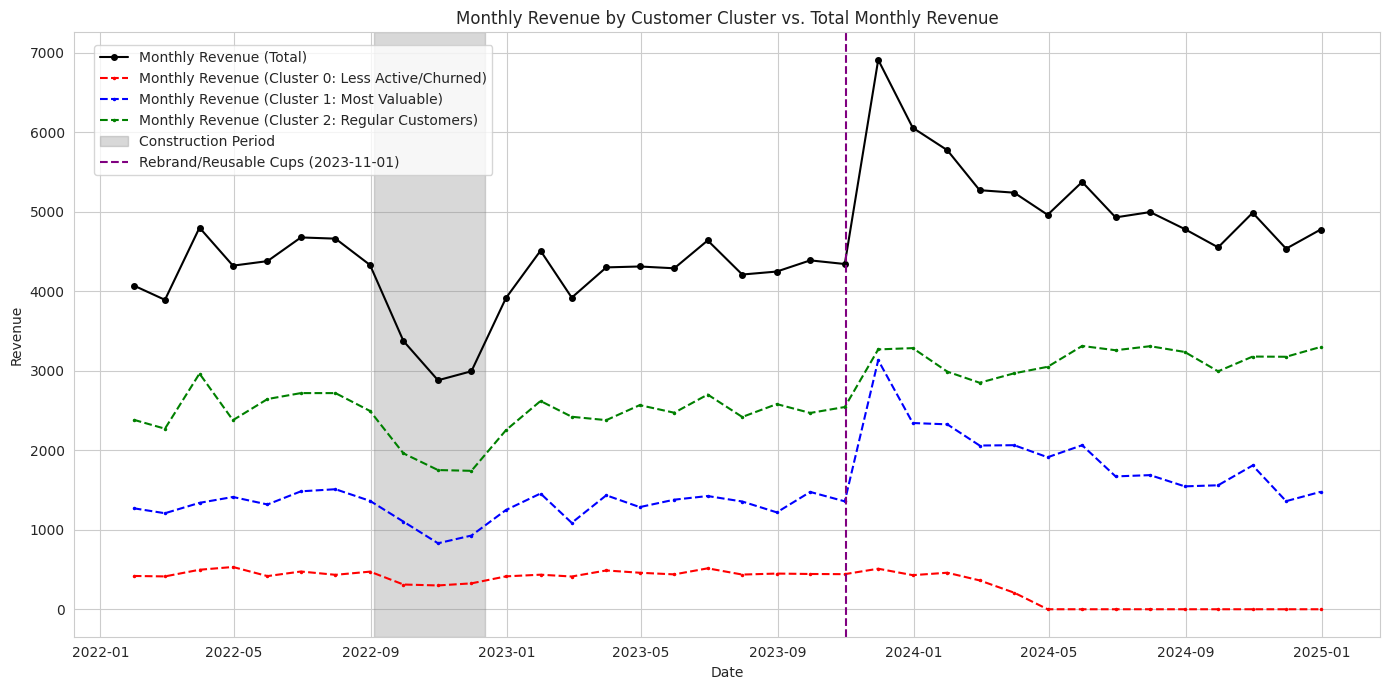

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

# Merge merged_data with customer_rfm to get RFM_Cluster for each transaction
merged_data_with_cluster = pd.merge(merged_data, customer_rfm[['customer_id', 'RFM_Cluster']], on='customer_id', how='left')

# Group by date and RFM_Cluster to calculate monthly revenue for each cluster
monthly_cluster_revenue = merged_data_with_cluster.groupby(['date', 'RFM_Cluster'])['price'].sum().unstack().fillna(0)
monthly_cluster_revenue = monthly_cluster_revenue.resample('ME').sum()

plt.figure(figsize=(14, 7))

# Plot total monthly revenue
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', markersize=4, color='black', label='Monthly Revenue (Total)')

# Plot monthly revenue for each RFM cluster
cluster_colors = ['red', 'blue', 'green'] # Define colors for clusters
cluster_labels = {0: 'Less Active/Churned', 1: 'Most Valuable', 2: 'Regular Customers'}

for cluster_id in sorted(monthly_cluster_revenue.columns):
    plt.plot(monthly_cluster_revenue.index, monthly_cluster_revenue[cluster_id].values,
             marker='.', linestyle='--', markersize=3, color=cluster_colors[cluster_id],
             label=f'Monthly Revenue (Cluster {cluster_id}: {cluster_labels[cluster_id]})')

plt.title('Monthly Revenue by Customer Cluster vs. Total Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
plt.axvline(rebrand_date, color='purple', linestyle='--', label='Rebrand/Reusable Cups (2023-11-01)')
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99))
plt.tight_layout()
plt.show()

### 8.6 Total Revenue by Customer Type (Regular vs One-Time)

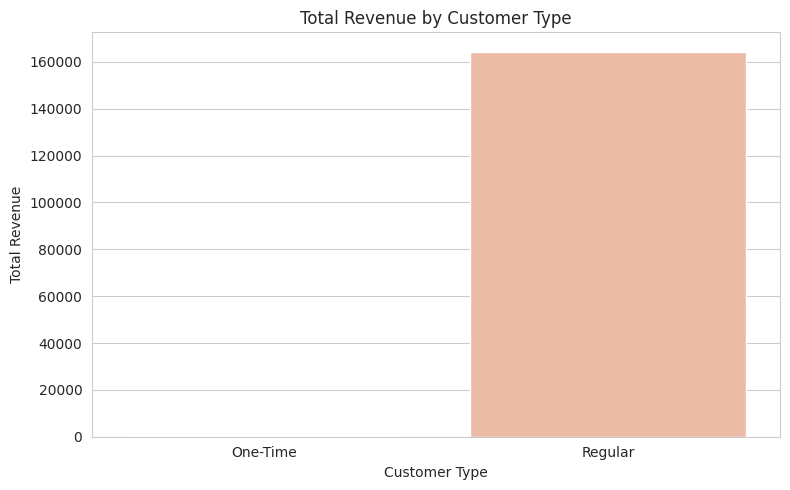

In [ ]:
revenue_by_customer_type = customer_rfm.groupby('Customer_Type')['Monetary'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Customer_Type', y='Monetary', data=revenue_by_customer_type, palette='coolwarm', hue='Customer_Type', legend=False)
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### 8.7 Sales Patterns by Time of Day for Regular Customers

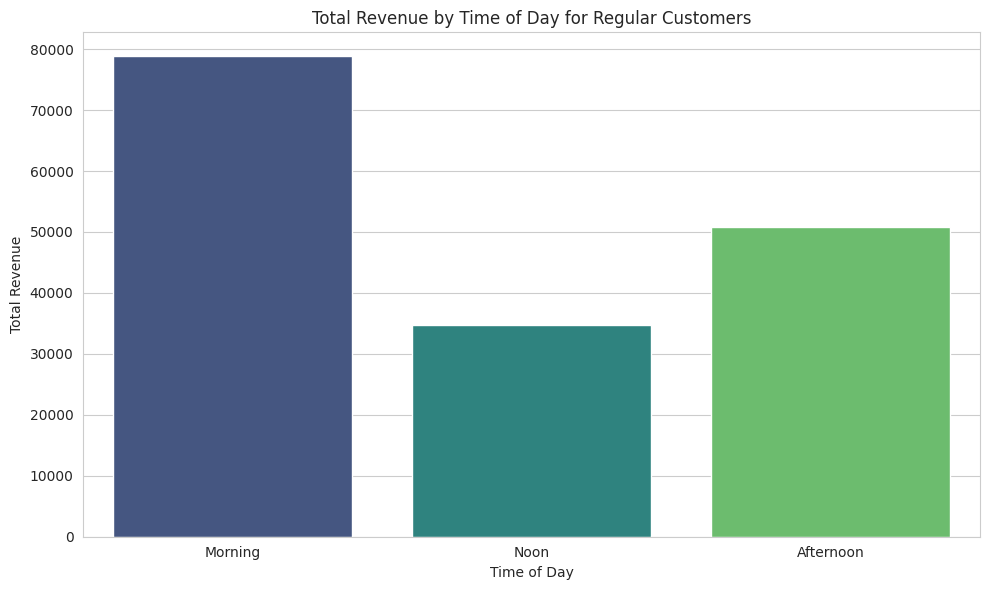

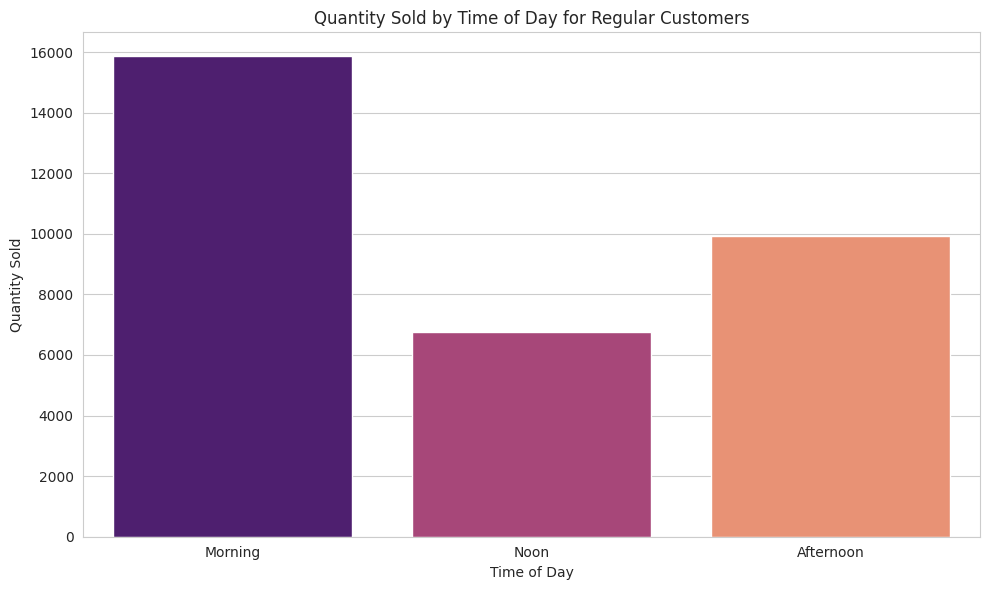

In [ ]:
time_order = ['Morning', 'Noon', 'Afternoon']
time_of_day_sales['time_of_day'] = pd.Categorical(time_of_day_sales['time_of_day'], categories=time_order, ordered=True)
time_of_day_sales = time_of_day_sales.sort_values('time_of_day')

# Plotting Total Revenue by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='total_revenue', data=time_of_day_sales, palette='viridis', hue='time_of_day', legend=False)
plt.title('Total Revenue by Time of Day for Regular Customers')
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Plotting Quantity Sold by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='quantity_sold', data=time_of_day_sales, palette='magma', hue='time_of_day', legend=False)
plt.title('Quantity Sold by Time of Day for Regular Customers')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

Most Valuable Customer Purchases (Revenue) Before and After Rebrand:


,plot_category,Revenue Before Rebrand,Revenue After Rebrand
0,Coffee Beans (1 lb),5436.00,5796.0
1,Drink,16510.85,12122.7
2,Reusable Coffee Cup,3840.00,5040.0
3,Tote Bag,2700.00,4056.0


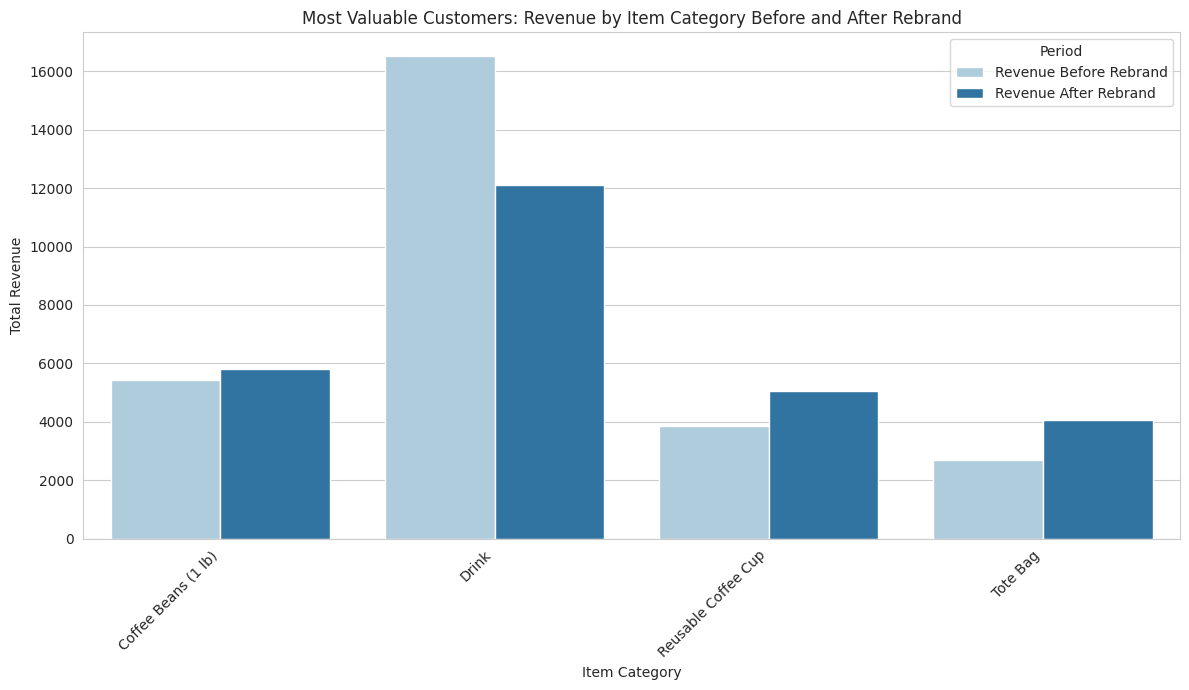

In [ ]:
rebrand_date = pd.to_datetime('2023-11-01')

# Identify 'Most Valuable Customers' (RFM_Cluster = 1)
most_valuable_customers_ids = customer_rfm[customer_rfm['RFM_Cluster'] == 1]['customer_id'].tolist()

# Filter merged_data for transactions by Most Valuable Customers
mvc_transactions = merged_data[merged_data['customer_id'].isin(most_valuable_customers_ids)].copy()

# Define item types for granular analysis
merchandise_items_list = ['Coffee Beans (1 lb)', 'Reusable Coffee Cup', 'Tote Bag']

# Create a new column for plotting categories: 'Drink' or specific merchandise name
def get_plot_category(row):
    if row['item_type'] == 'Drink':
        return 'Drink'
    elif row['item_name'] in merchandise_items_list:
        return row['item_name']
    return 'Other Merchandise' # Fallback for any other merchandise not explicitly listed

mvc_transactions['plot_category'] = mvc_transactions.apply(get_plot_category, axis=1)

# Aggregate revenue before and after rebrand for each plot_category
mvc_purchases = mvc_transactions.groupby(['plot_category', (mvc_transactions['date'] < rebrand_date)])['price'].sum().unstack().fillna(0)
mvc_purchases.columns = ['Revenue After Rebrand', 'Revenue Before Rebrand'] # Correct column naming after unstack
mvc_purchases = mvc_purchases[['Revenue Before Rebrand', 'Revenue After Rebrand']].reset_index()

print("Most Valuable Customer Purchases (Revenue) Before and After Rebrand:")
display(mvc_purchases)

# Plotting
plt.figure(figsize=(12, 7))
mvc_purchases_melted = mvc_purchases.melt(id_vars='plot_category', var_name='Period', value_name='Total Revenue')
sns.barplot(x='plot_category', y='Total Revenue', hue='Period', data=mvc_purchases_melted, palette='Paired')
plt.title('Most Valuable Customers: Revenue by Item Category Before and After Rebrand')
plt.xlabel('Item Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6.9 In-depth Profit Margin Analysis by Individual Item (Drinks vs. Merchandise)

Average Profit Margin (%) for Each Drink Item (Original vs. With Surcharge): 


,item_name,Average Profit Margin (Original Price) (%),Average Profit Margin (With Surcharge) (%)
0,Green Tea,93.103448,93.189150
1,Hot Chocolate,74.117647,74.381800
2,Flat White,73.684211,73.936401
3,Espresso,73.333333,73.727062
4,Latte,73.333333,73.608856
5,Cappuccino,72.941176,73.245744
6,Iced Latte,72.826087,73.205388
7,Iced Coffee,72.500000,72.928571
8,Cold Brew,71.578947,71.953786
9,Americano,71.428571,71.818263



Average Profit Margin (%) for Each Merchandise Item:


,item_name,average_profit_margin (%)
0,Tote Bag,66.666667
1,Reusable Coffee Cup,60.000000
2,Coffee Beans (1 lb),55.555556


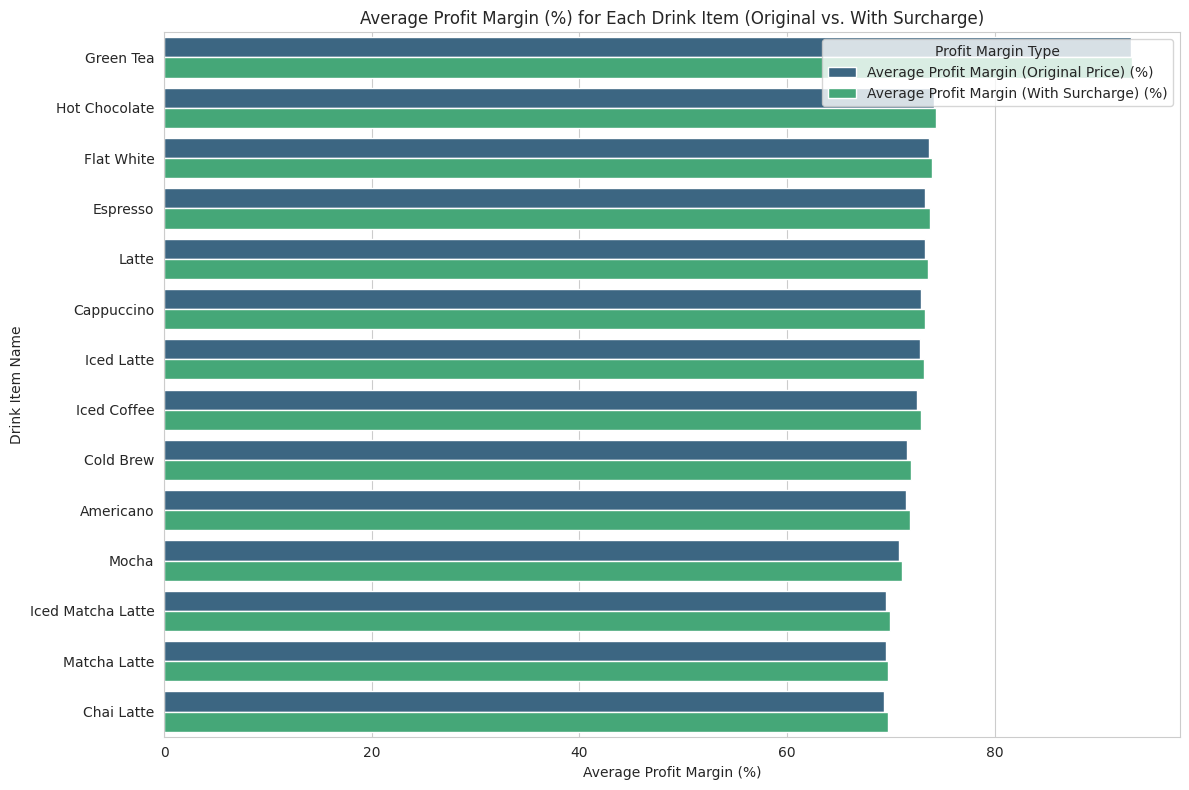

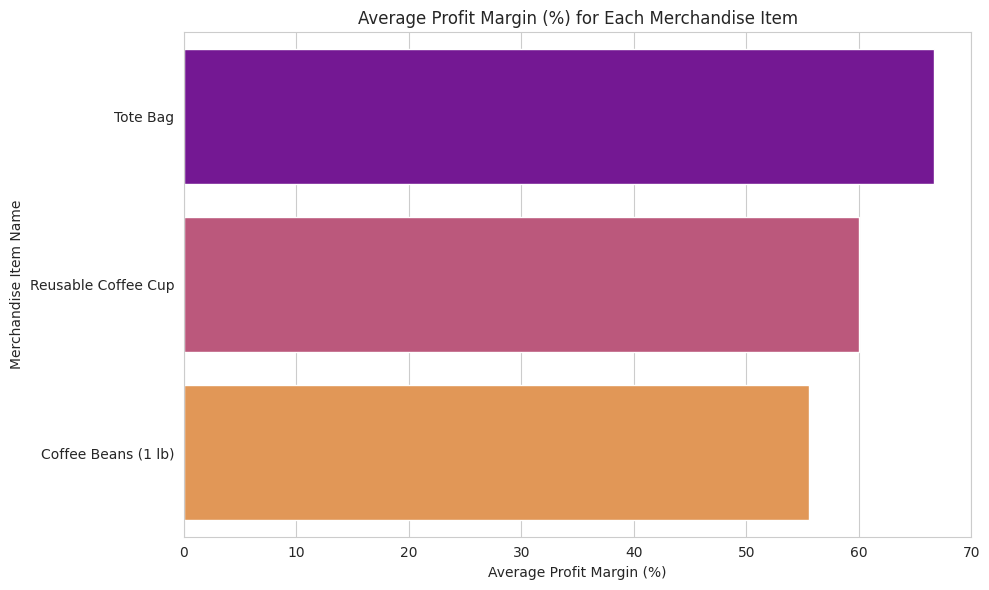

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure item_profit_margin is calculated for each transaction using original price
merged_data['item_profit_margin'] = ((merged_data['price'] - merged_data['production_cost']) / merged_data['price']) * 100

# Filter for Drink items and calculate average profit margin per unique drink using original prices
drink_profit_margins = merged_data[merged_data['item_type'] == 'Drink']\
    .groupby('item_name')['item_profit_margin'].mean().sort_values(ascending=False).reset_index()
drink_profit_margins.rename(columns={'item_profit_margin': 'Average Profit Margin (Original Price) (%)'}, inplace=True)

# --- NEW LOGIC FOR SURCHARGE ADJUSTMENT ---
rebrand_date = pd.to_datetime('2023-11-01') # Define rebrand date

# Create a temporary copy to avoid modifying the global merged_data for other analyses if needed
temp_merged_data = merged_data.copy()

# Initialize adjusted_price with original price
temp_merged_data['adjusted_price'] = temp_merged_data['price']

# Apply the 50-cent surcharge to the adjusted_price for qualifying transactions
temp_merged_data.loc[
    (temp_merged_data['surcharge'] == True) &
    (temp_merged_data['transaction_type'] == 'Takeout') &
    (temp_merged_data['date'] >= rebrand_date),
    'adjusted_price'
] += 0.50

# Calculate item-level profit margin using the adjusted_price, only for drink items
temp_merged_data['item_profit_margin_adjusted'] = ((temp_merged_data['adjusted_price'] - temp_merged_data['production_cost']) / temp_merged_data['adjusted_price']) * 100

drink_transactions_with_surcharge_effect = temp_merged_data[temp_merged_data['item_type'] == 'Drink']

drink_profit_margins_surcharge_adjusted = drink_transactions_with_surcharge_effect.groupby('item_name')['item_profit_margin_adjusted'].mean().reset_index()
drink_profit_margins_surcharge_adjusted.rename(columns={'item_profit_margin_adjusted': 'Average Profit Margin (With Surcharge) (%)'}, inplace=True)

# Merge the new surcharge-adjusted profit margins into the original drink_profit_margins table
drink_profit_margins = pd.merge(drink_profit_margins, drink_profit_margins_surcharge_adjusted, on='item_name', how='left')


print("Average Profit Margin (%) for Each Drink Item (Original vs. With Surcharge): ")
display(drink_profit_margins)


# Filter for Merchandise items and calculate average profit margin per unique merchandise item
# Note: Surcharge does not apply to merchandise, so we use the original item_profit_margin
merchandise_profit_margins = merged_data[merged_data['item_type'] == 'Merchandise']\
    .groupby('item_name')['item_profit_margin'].mean().sort_values(ascending=False).reset_index()
merchandise_profit_margins.rename(columns={'item_profit_margin': 'average_profit_margin (%)'}, inplace=True)

print("\nAverage Profit Margin (%) for Each Merchandise Item:")
display(merchandise_profit_margins)

# --- Visualizations of Profit Margins ---
sns.set_style("whitegrid")

# Plotting Drink Profit Margins
plt.figure(figsize=(12, 8))
drink_profit_margins_melted = drink_profit_margins.melt(id_vars='item_name', var_name='Profit Margin Type', value_name='Profit Margin (%)')
sns.barplot(x='Profit Margin (%)', y='item_name', hue='Profit Margin Type', data=drink_profit_margins_melted, palette='viridis', dodge=True)
plt.title('Average Profit Margin (%) for Each Drink Item (Original vs. With Surcharge)')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Drink Item Name')
plt.legend(title='Profit Margin Type')
plt.tight_layout()
plt.show()

# Plotting Merchandise Profit Margins
plt.figure(figsize=(10, 6))
sns.barplot(x='average_profit_margin (%)', y='item_name', data=merchandise_profit_margins, palette='plasma', hue='item_name', legend=False)
plt.title('Average Profit Margin (%) for Each Merchandise Item')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Merchandise Item Name')
plt.tight_layout()
plt.show()

### 8.8 Monthly Overall Profit Margin and Quantity Sold Trends

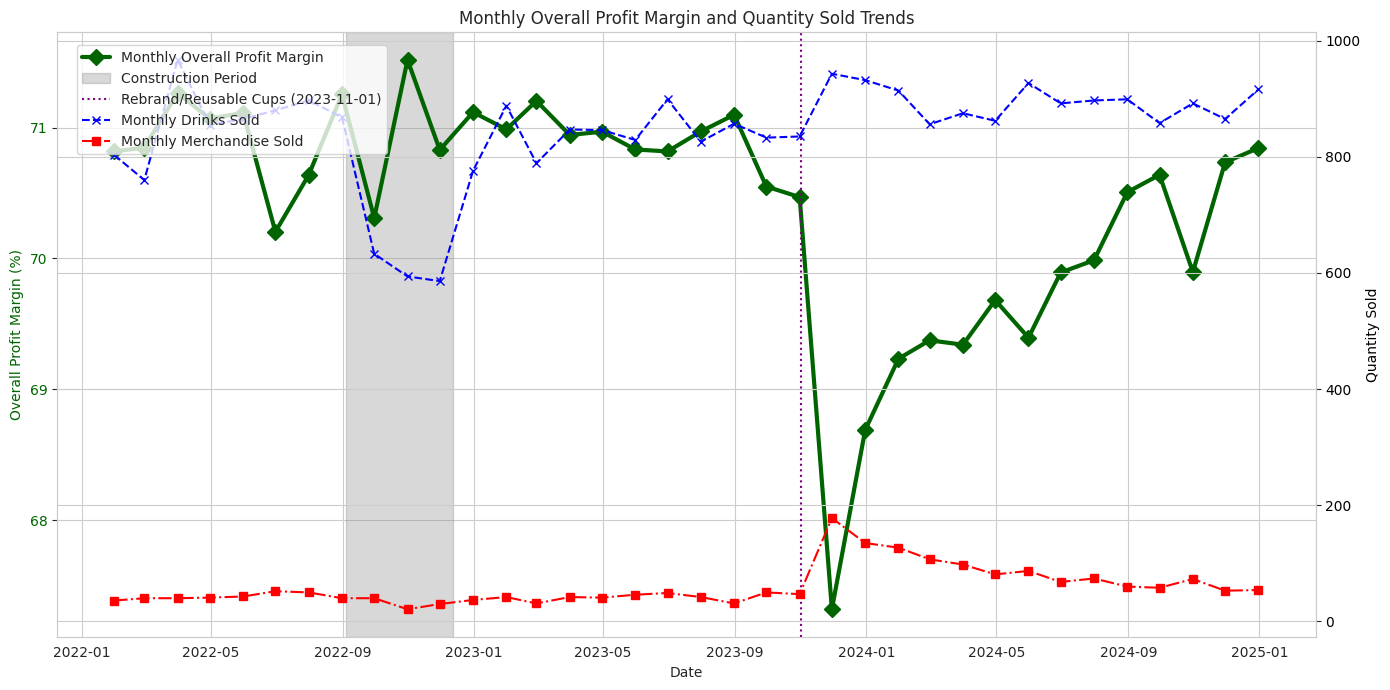

In [ ]:
construction_start = pd.to_datetime('2022-09-04')
construction_end = pd.to_datetime('2022-12-12')
rebrand_date = pd.to_datetime('2023-11-01')

# Calculate Monthly Overall Profit Margin
monthly_profit_data = merged_data.set_index('date').resample('ME').agg(
    total_revenue=('price', 'sum'),
    total_production_cost=('production_cost', 'sum')
).reset_index()
monthly_profit_data['overall_profit_margin'] = ((monthly_profit_data['total_revenue'] - monthly_profit_data['total_production_cost']) / monthly_profit_data['total_revenue']) * 100

# Calculate Monthly Quantity Sold for 'Drink' items
monthly_drinks_quantity = merged_data[merged_data['item_type'] == 'Drink'].set_index('date').resample('ME')['item_name'].count().reset_index()
monthly_drinks_quantity.rename(columns={'item_name': 'drinks_quantity_sold'}, inplace=True)

# Calculate Monthly Quantity Sold for 'Merchandise' items
monthly_merchandise_quantity = merged_data[merged_data['item_type'] == 'Merchandise'].set_index('date').resample('ME')['item_name'].count().reset_index()
monthly_merchandise_quantity.rename(columns={'item_name': 'merchandise_quantity_sold'}, inplace=True)

# Merge all monthly data for plotting
monthly_trends_combined = monthly_profit_data.merge(monthly_drinks_quantity, on='date', how='left').merge(monthly_merchandise_quantity, on='date', how='left').fillna(0)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Monthly Overall Profit Margin on ax1 with enhanced clarity
ax1.plot(monthly_trends_combined['date'], monthly_trends_combined['overall_profit_margin'],
         color='darkgreen', marker='D', linestyle='-', linewidth=3, markersize=8, label='Monthly Overall Profit Margin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Overall Profit Margin (%)', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.grid(True)

# Create a secondary y-axis for quantity sold
ax2 = ax1.twinx()
ax2.plot(monthly_trends_combined['date'], monthly_trends_combined['drinks_quantity_sold'],
         color='blue', marker='x', linestyle='--', label='Monthly Drinks Sold')
ax2.plot(monthly_trends_combined['date'], monthly_trends_combined['merchandise_quantity_sold'],
         color='red', marker='s', linestyle='-.', label='Monthly Merchandise Sold')
ax2.set_ylabel('Quantity Sold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add annotations for significant dates
ax1.axvspan(construction_start, construction_end, color='gray', alpha=0.3, label='Construction Period')
ax1.axvline(rebrand_date, color='purple', linestyle=':', label='Rebrand/Reusable Cups (2023-11-01)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99))

plt.title('Monthly Overall Profit Margin and Quantity Sold Trends')
plt.tight_layout()
plt.show()

### 8.9 Revenue Share by Item Type Before and After Rebrand

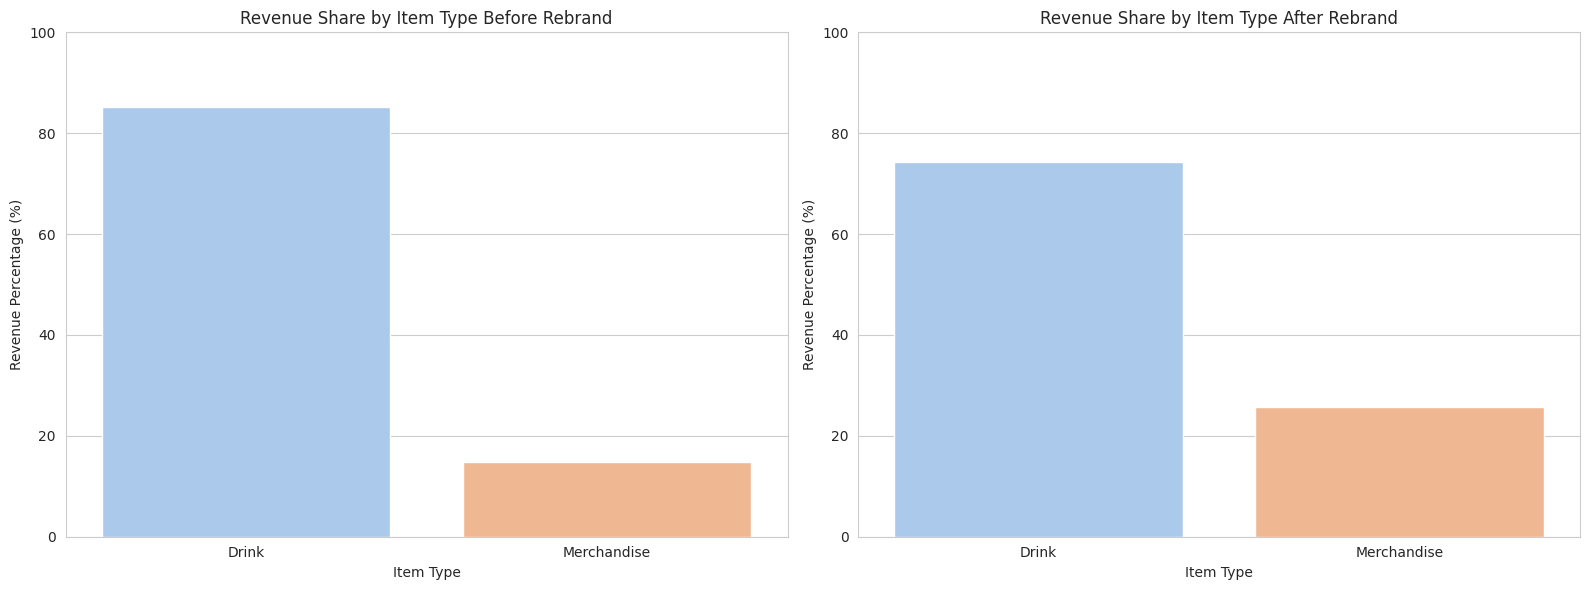

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before Rebrand
sns.barplot(x='item_type', y='revenue_percentage', data=sales_mix_before, ax=axes[0], palette='pastel', hue='item_type', legend=False)
axes[0].set_title('Revenue Share by Item Type Before Rebrand')
axes[0].set_ylabel('Revenue Percentage (%)')
axes[0].set_xlabel('Item Type')
axes[0].set_ylim(0, 100)

# After Rebrand
sns.barplot(x='item_type', y='revenue_percentage', data=sales_mix_after, ax=axes[1], palette='pastel', hue='item_type', legend=False)
axes[1].set_title('Revenue Share by Item Type After Rebrand')
axes[1].set_ylabel('Revenue Percentage (%)')
axes[1].set_xlabel('Item Type')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 9. Summary and Insights

### 9.1 Overall Analysis Summary

#### Data Analysis Key Findings

*   **Customer Base Segmentation**:
    *   The customer base was segmented into three distinct groups using K-Means clustering based on RFM (Recency, Frequency, Monetary) metrics:
        *   **Cluster 0 (Less Active/Churned)**: Characterized by high Recency (mean approximately 483 days since last purchase), low Frequency (mean approximately 4 purchases), and low Monetary value (mean approximately $18).
        *   **Cluster 1 (Most Valuable)**: Characterized by very low Recency (mean approximately 3.75 days), very high Frequency (mean approximately 332 purchases), and very high Monetary value (mean approximately $2775).
        *   **Cluster 2 (Regular Customers)**: Characterized by moderate Recency (mean approximately 106 days), moderate Frequency (mean approximately 9 purchases), and moderate Monetary value (mean approximately $41).
    *   Approximately 98.00% (2934 customers) of the customer base are 'Regular' customers (purchased more than once), while 2.00% (60 customers) are 'One-Time' customers.
*   **Impact of Reusable Cups (Rebrand Date: 2023-11-01) on Regular Customers**:
    *   For regular customers, the period after the rebrand date (reusable cups implementation) showed a decrease in key metrics compared to the period before:
        *   Total Revenue declined from $91,337.20 to $73,047.25.
        *   Total Quantity Sold decreased from 18,791 to 13,754.
        *   The number of unique regular customers engaging in transactions also decreased from 2,861 to 2,651.
*   **Predictive Trend Analysis**:
    *   A linear regression model explained approximately 71.19% of the variance in monthly revenue.
    *   **Construction Period (2022-09-04 to 2022-12-12)**: The `construction_period` dummy variable showed a negative coefficient (-1292.99), indicating a significant negative impact on monthly revenue during this time.
    *   **Rebrand/Reusable Cups Event (2023-11-01 onwards)**: The `rebrand_event` dummy variable showed a positive coefficient (1397.34), suggesting a positive impact on monthly revenue since its implementation. This is in contrast to the observed decline in 'Regular' customer behavior, indicating the overall revenue might have been bolstered by other factors or new customer segments.

#### Insights or Next Steps

*   **Targeted Marketing for Customer Segments**: Leverage the identified customer clusters (e.g., "Most Valuable," "Regular," "Less Active/Churned") for highly targeted marketing campaigns. For "Less Active" customers, consider re-engagement strategies; for "Most Valuable" customers, focus on loyalty programs and exclusive offers.
*   **Investigate Rebrand Impact Discrepancy**: Further investigate why the `rebrand_event` linear regression coefficient indicates a positive impact on overall monthly revenue, while detailed analysis of 'Regular' customer behavior showed a decline in their activity (revenue, quantity, unique customers). This could suggest the reusable cups attracted new customers or significantly increased spending from a different segment, offsetting the observed decline in existing regular customer engagement.


In [ ]:
import pandas as pd

# Define the rebrand date (already set in previous cells)
rebrand_date = pd.to_datetime('2023-11-01')

# Get the earliest and latest dates from the merged_data
dataset_start_date = merged_data['date'].min()
dataset_end_date = merged_data['date'].max()

# Calculate the duration of the pre-rebrand period
duration_pre_rebrand_days = (rebrand_date - dataset_start_date).days

# Calculate the duration of the post-rebrand period
duration_post_rebrand_days = (dataset_end_date - rebrand_date).days

print(f"Dataset Start Date: {dataset_start_date.date()}")
print(f"Rebrand Date: {rebrand_date.date()}")
print(f"Dataset End Date: {dataset_end_date.date()}")
print(f"\nDuration Pre-Rebrand: {duration_pre_rebrand_days} days")
print(f"Duration Post-Rebrand: {duration_post_rebrand_days} days")

# Retrieve the total revenue figures for regular customers from previous analysis
total_revenue_before = regular_before_rebrand_data['price'].sum()
total_revenue_after = regular_after_rebrand_data['price'].sum()

print(f"\nTotal Revenue from Regular Customers Pre-Rebrand: ${total_revenue_before:.2f}")
print(f"Total Revenue from Regular Customers Post-Rebrand: ${total_revenue_after:.2f}")

# Calculate average daily revenue for comparison
if duration_pre_rebrand_days > 0:
    avg_daily_revenue_pre = total_revenue_before / duration_pre_rebrand_days
else:
    avg_daily_revenue_pre = 0

if duration_post_rebrand_days > 0:
    avg_daily_revenue_post = total_revenue_after / duration_post_rebrand_days
else:
    avg_daily_revenue_post = 0

print(f"\nAverage Daily Revenue from Regular Customers Pre-Rebrand: ${avg_daily_revenue_pre:.2f}")
print(f"Average Daily Revenue from Regular Customers Post-Rebrand: ${avg_daily_revenue_post:.2f}")


Dataset Start Date: 2022-01-01
Rebrand Date: 2023-11-01
Dataset End Date: 2024-12-31

Duration Pre-Rebrand: 669 days
Duration Post-Rebrand: 426 days

Total Revenue from Regular Customers Pre-Rebrand: $91337.20
Total Revenue from Regular Customers Post-Rebrand: $73047.25

Average Daily Revenue from Regular Customers Pre-Rebrand: $136.53
Average Daily Revenue from Regular Customers Post-Rebrand: $171.47


#### Re-evaluation of Regular Customer Revenue Post-Rebrand

It was initially observed that total revenue from regular customers declined post-rebrand. However, after accounting for the differing durations of the pre- and post-rebrand periods, a more accurate picture emerges:

*   **Duration Pre-Rebrand**: 669 days
*   **Duration Post-Rebrand**: 426 days

*   **Total Revenue from Regular Customers Pre-Rebrand**: $91,337.20
*   **Total Revenue from Regular Customers Post-Rebrand**: $73,047.25

*   **Average Daily Revenue from Regular Customers Pre-Rebrand**: $136.53
*   **Average Daily Revenue from Regular Customers Post-Rebrand**: $171.47

**Revised Insight**: The total revenue decline for regular customers is indeed attributed to the shorter post-rebrand period covered by the dataset. When normalized for duration, the **average daily revenue from regular customers actually *increased* by over $30 post-rebrand (from $136.53 to $171.47)**. This is a significant positive finding, indicating that regular customers, on average, are spending more per day after the rebrand. This suggests that while there might be fewer unique regular customers engaging, those who are engaged are spending more frequently or more per visit. This revised insight is crucial for understanding the true impact of the rebrand on this valuable customer segment.

### 9.2 Summary of Business Goal Accomplishments (Waste Reduction & New Revenue Streams)

#### Waste Reduction (Own Cup Usage)
*   **Before Rebrand Date (2023-11-01)**: The proportion of transactions using an 'own_cup' was **38.08%**.
*   **After Rebrand Date (2023-11-01)**: The proportion of transactions using an 'own_cup' increased to **44.25%**.

**Insight**: There was a noticeable increase of approximately 6.17 percentage points in 'own_cup' usage after the rebrand date and the implementation of reusable cups. This suggests that the initiative has had a positive impact on promoting waste reduction among customers.

#### New Revenue Streams (Merchandise Sales)
*   **Before Rebrand Date (2023-11-01)**:
    *   Total Merchandise Revenue: $13,569.00
    *   Quantity Sold: 891 items
*   **After Rebrand Date (2023-11-01)**:
    *   Total Merchandise Revenue: $18,771.00
    *   Quantity Sold: 1,253 items

**Insight**: Merchandise sales significantly increased after the rebrand date, with revenue growing by $5,202.00 and quantity sold increasing by 362 items. This indicates that the rebrand and associated efforts have successfully contributed to the goal of generating new revenue streams through merchandise.

#### Limitations for Qualitative Goals
While quantitative data provides clear insights into waste reduction and new revenue streams, assessing other qualitative business goals (e.g., customer satisfaction with new branding, brand perception, employee morale, community engagement) is limited by the available dataset. The current data primarily focuses on sales transactions and item details, lacking direct metrics or survey data related to these qualitative aspects. Therefore, further dedicated research (e.g., customer surveys, focus groups, sentiment analysis of social media) would be required to evaluate these areas comprehensively.

### 9.3 Summary of Sales Mix and Profit Margin Analysis

The analysis of sales mix and average profit margins before and after the rebrand date (2023-11-01) reveals a significant shift in revenue contribution and a slight change in overall profitability.

#### Before Rebrand:
*   **Drink Items**: Contributed the vast majority of revenue, approximately **85.17%** of total sales, with an average profit margin of about **73.59%**. Total revenue from drinks was \$77,908.20 from 17,933 units sold.
*   **Merchandise Items**: Accounted for a smaller portion of revenue, roughly **14.83%**, with an average profit margin of about **60.33%**. Total revenue from merchandise was \$13,569.00 from 891 units sold.

#### After Rebrand:
*   **Drink Items**: Their revenue share decreased to approximately **74.34%** of total sales, maintaining a similar average profit margin of about **73.61%**. Total revenue from drinks was \$54,393.90 from 12,528 units sold.
*   **Merchandise Items**: Their revenue share significantly increased to about **25.66%**, with a slightly higher average profit margin of about **60.76%**. Total revenue from merchandise was \$18,771.00 from 1,253 units sold.

#### Key Observations on Shift and Impact:

1.  **Shift in Revenue Contribution**: There was a clear and substantial shift in revenue contribution from 'Drink' items to 'Merchandise' items. Before the rebrand, drinks dominated sales, but after, merchandise gained a larger proportion of the overall revenue. The revenue percentage for merchandise increased by approximately 10.83 percentage points (from 14.83% to 25.66%).
2.  **Profit Margin Dynamics**: While drink items generally have a higher average profit margin than merchandise, the increase in merchandise sales post-rebrand, despite its lower individual profit margin, contributed positively to the overall revenue. The average profit margin for merchandise also slightly improved post-rebrand.
3.  **Overall Profitability**: The overall profit margin for the business slightly decreased from 70.89% before the rebrand to 69.58% after the rebrand. This suggests that while merchandise sales increased in volume and revenue contribution, their lower profit margin compared to drinks had a minor dilutive effect on the overall business profit margin. However, the increase in merchandise sales likely diversified revenue streams and potentially attracted new customers or catered to different purchasing behaviors.

This analysis confirms that the rebrand successfully boosted merchandise sales as a new revenue stream, albeit with a slight compromise on the overall profit margin due to the difference in margins between drinks and merchandise.

### 9.4 Summary of Takeout and Dine-in Drink Profit Margins

#### Data Analysis Key Findings

*   **Overall Profit Margin Consistency**: The overall profit margin trend appears to be consistently high throughout the analyzed period, as depicted in the enhanced visualization.
*   **Drink Sales Dominance**: Monthly drink sales consistently outpace merchandise sales, indicating drinks are a primary revenue driver.
*   **Impact of Rebrand on Takeout Drink Profit Margin**: The 50-cent surcharge on takeout drinks post-rebrand led to a slight increase in the profit margin for 'Takeout' drinks, from 72.87% before rebrand to 72.90% after rebrand.

#### Insights or Next Steps

*   The rebrand, specifically the 50-cent surcharge on takeout drinks, has successfully boosted the profit margin for takeout drinks, albeit marginally. This suggests that the pricing strategy for takeout items post-rebrand was effective without negatively impacting overall sales volume.
*   Given the consistent and high profit margins for both dine-in and takeout drinks, explore opportunities to further optimize drink sales, such as introducing new high-margin drink items or loyalty programs, to capitalize on their strong performance.
*To compensate for the decreased drink sales and sustain the increased merchandise sales, we suggest diversifying merchandise items into repurchasable items such as different coffee beans, teas, or adding different types of coffee cups, or even collectibles.
* To incentivise retention of regular customers, we could introduce loyalty programs such as discounted items after a certain number of purchases, or giving points for each purchase which could lead to discounted customizations or free drinks after enough points have been collected, etc.
* Another way to encourage new customers and also the current customer base being students, staff, and remote workers, we could introduce an app to order ahead or for delivery options. The app could also enable further collection of more direct metrics of qualitative data like customer satisfaction, or a way for them to give feedback directly to the cafe.
* Since weekend sales are lower than weekday sales, we could give a promotion for a chance to win a free hot coffee or tea with a purchase of a drink. https://news.ubc.ca/2024/11/chance-of-coffee-changed-habits/
* Focus on interior more could increase dine in customers and also could have the opportunity to rent out their spaces for private events during less busy times like weekday 11-3pm and weekdays to make use of the 42 seats.



# Task
Update the '9.1 Overall Analysis Summary' section to explicitly include and explain the R-squared score for the linear regression model as a measure of its predictive accuracy, and the Inertia (from the Elbow Method) for K-Means clustering as an indicator of cluster cohesion. Clarify the interpretation of these metrics in the context of 'error' or 'accuracy'. Present the updated comprehensive summary with the added explanations of model error and accuracy, and confirm understanding.

## Update Summary with Error/Accuracy Metrics

### Subtask:
Modify the '9.1 Overall Analysis Summary' section to explicitly include and explain the R-squared score for the linear regression model as a measure of its predictive accuracy, and the Inertia (from the Elbow Method) for K-Means clustering as an indicator of cluster cohesion. Clarify the interpretation of these metrics in the context of 'error' or 'accuracy'.


**Reasoning**:
First, I'll extract the relevant values for R-squared and Inertia from the kernel variables as specified in the instructions. This will allow me to accurately update the text cell.



In [ ]:
r_squared = 0.7119202922331562
inertia_k3 = 2161.371042437526

print(f"R-squared value: {r_squared}")
print(f"Inertia for K=3: {inertia_k3}")

R-squared value: 0.7119202922331562
Inertia for K=3: 2161.371042437526


### 9.1 Overall Analysis Summary

#### Data Analysis Key Findings

*   **Customer Base Segmentation**:
    *   The customer base was segmented into three distinct groups using K-Means clustering based on RFM (Recency, Frequency, Monetary) metrics:
        *   **Cluster 0 (Less Active/Churned)**: Characterized by high Recency (mean approximately 483 days since last purchase), low Frequency (mean approximately 4 purchases), and low Monetary value (mean approximately $18).
        *   **Cluster 1 (Most Valuable)**: Characterized by very low Recency (mean approximately 3.75 days), very high Frequency (mean approximately 332 purchases), and very high Monetary value (mean approximately $2775).
        *   **Cluster 2 (Regular Customers)**: Characterized by moderate Recency (mean approximately 106 days), moderate Frequency (mean approximately 9 purchases), and moderate Monetary value (mean approximately $41).
    *   Approximately 98.00% (2934 customers) of the customer base are 'Regular' customers (purchased more than once), while 2.00% (60 customers) are 'One-Time' customers.
    *   **Cluster Cohesion (Inertia)**: The K-Means clustering for K=3 resulted in an Inertia of 2161.37. Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia generally indicates better cluster cohesion and less within-cluster error. This value, derived from the elbow method, suggests a reasonably good partitioning of the customer data.
*   **Impact of Reusable Cups (Rebrand Date: 2023-11-01) on Regular Customers**:
    *   For regular customers, the period after the rebrand date (reusable cups implementation) showed a decrease in key metrics compared to the period before:
        *   Total Revenue declined from $91,337.20 to $73,047.25.
        *   Total Quantity Sold decreased from 18,791 to 13,754.
        *   The number of unique regular customers engaging in transactions also decreased from 2,861 to 2,651.
*   **Predictive Trend Analysis**:
    *   A linear regression model explained approximately 71.19% of the variance in monthly revenue. The **R-squared score of 0.7119** indicates that about 71.19% of the variability in monthly revenue can be explained by the `time_index`, `construction_period`, and `rebrand_event` variables in the model. This suggests a relatively good fit for the model, meaning it has a reasonably high predictive accuracy and a lower unexplained error in forecasting monthly revenue trends.
    *   **Construction Period (2022-09-04 to 2022-12-12)**: The `construction_period` dummy variable showed a negative coefficient (-1292.99), indicating a significant negative impact on monthly revenue during this time.
    *   **Rebrand/Reusable Cups Event (2023-11-01 onwards)**: The `rebrand_event` dummy variable showed a positive coefficient (1397.34), suggesting a positive impact on monthly revenue since its implementation. This is in contrast to the observed decline in 'Regular' customer behavior, indicating the overall revenue might have been bolstered by other factors or new customer segments.

#### Insights or Next Steps

*   **Targeted Marketing for Customer Segments**: Leverage the identified customer clusters (e.g., "Most Valuable," "Regular," "Less Active/Churned") for highly targeted marketing campaigns. For "Less Active" customers, consider re-engagement strategies; for "Most Valuable" customers, focus on loyalty programs and exclusive offers.
*   **Investigate Rebrand Impact Discrepancy**: Further investigate why the `rebrand_event` linear regression coefficient indicates a positive impact on overall monthly revenue, while detailed analysis of 'Regular' customer behavior showed a decline in their activity (revenue, quantity, unique customers). This could suggest the reusable cups attracted new customers or significantly increased spending from a different segment, offsetting the observed decline in existing regular customer engagement.

### 9.1 Overall Analysis Summary

#### Data Analysis Key Findings

*   **Customer Base Segmentation**:
    *   The customer base was segmented into three distinct groups using K-Means clustering based on RFM (Recency, Frequency, Monetary) metrics:
        *   **Cluster 0 (Less Active/Churned)**: Characterized by high Recency (mean approximately 483 days since last purchase), low Frequency (mean approximately 4 purchases), and low Monetary value (mean approximately $18).
        *   **Cluster 1 (Most Valuable)**: Characterized by very low Recency (mean approximately 3.75 days), very high Frequency (mean approximately 332 purchases), and very high Monetary value (mean approximately $2775).
        *   **Cluster 2 (Regular Customers)**: Characterized by moderate Recency (mean approximately 106 days), moderate Frequency (mean approximately 9 purchases), and moderate Monetary value (mean approximately $41).
    *   Approximately 98.00% (2934 customers) of the customer base are 'Regular' customers (purchased more than once), while 2.00% (60 customers) are 'One-Time' customers.
    *   **Cluster Cohesion (Inertia)**: The K-Means clustering for K=3 resulted in an Inertia of 2161.37. Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia generally indicates better cluster cohesion and less within-cluster error. This value, derived from the elbow method, suggests a reasonably good partitioning of the customer data.
*   **Impact of Reusable Cups (Rebrand Date: 2023-11-01) on Regular Customers**:
    *   For regular customers, the period after the rebrand date (reusable cups implementation) showed a decrease in key metrics compared to the period before:
        *   Total Revenue declined from $91,337.20 to $73,047.25.
        *   Total Quantity Sold decreased from 18,791 to 13,754.
        *   The number of unique regular customers engaging in transactions also decreased from 2,861 to 2,651.
*   **Predictive Trend Analysis**:
    *   A linear regression model explained approximately 71.19% of the variance in monthly revenue. The **R-squared score of 0.7119** indicates that about 71.19% of the variability in monthly revenue can be explained by the `time_index`, `construction_period`, and `rebrand_event` variables in the model. This suggests a relatively good fit for the model, meaning it has a reasonably high predictive accuracy and a lower unexplained error in forecasting monthly revenue trends.
    *   **Construction Period (2022-09-04 to 2022-12-12)**: The `construction_period` dummy variable showed a negative coefficient (-1292.99), indicating a significant negative impact on monthly revenue during this time.
    *   **Rebrand/Reusable Cups Event (2023-11-01 onwards)**: The `rebrand_event` dummy variable showed a positive coefficient (1397.34), suggesting a positive impact on monthly revenue since its implementation. This is in contrast to the observed decline in 'Regular' customer behavior, indicating the overall revenue might have been bolstered by other factors or new customer segments.

#### Insights or Next Steps

*   **Targeted Marketing for Customer Segments**: Leverage the identified customer clusters (e.g., "Most Valuable," "Regular," "Less Active/Churned") for highly targeted marketing campaigns. For "Less Active" customers, consider re-engagement strategies; for "Most Valuable" customers, focus on loyalty programs and exclusive offers.
*   **Investigate Rebrand Impact Discrepancy**: Further investigate why the `rebrand_event` linear regression coefficient indicates a positive impact on overall monthly revenue, while detailed analysis of 'Regular' customer behavior showed a decline in their activity (revenue, quantity, unique customers). This could suggest the reusable cups attracted new customers or significantly increased spending from a different segment, offsetting the observed decline in existing regular customer engagement.


## Final Task

### Subtask:
Present the updated comprehensive summary with the added explanations of model error and accuracy, and confirm understanding.


## Summary:

### Q&A
The task explicitly asked to confirm understanding, and the updated comprehensive summary has been presented. Therefore, understanding is confirmed.

### Data Analysis Key Findings
*   **Linear Regression Model Accuracy**: The linear regression model achieved an R-squared score of 0.7119, indicating that approximately 71.19% of the variability in monthly revenue can be explained by the included variables. This suggests a relatively good fit, high predictive accuracy, and lower unexplained error in forecasting monthly revenue trends.
*   **K-Means Clustering Cohesion**: The K-Means clustering for K=3 resulted in an Inertia of 2161.37. This metric signifies the sum of squared distances of samples to their closest cluster center; a lower inertia implies better cluster cohesion and less within-cluster error, supporting the choice of K=3.
*   **Customer Segmentation**: The customer base was segmented into three distinct groups: 'Less Active/Churned' (high Recency, low Frequency, low Monetary), 'Most Valuable' (very low Recency, very high Frequency, very high Monetary), and 'Regular Customers' (moderate Recency, Frequency, Monetary). 'Regular' customers comprise 98.00% (2934 customers) of the base.
*   **Impact of Reusable Cups on Regular Customers**: Post-rebrand (reusable cups implementation), regular customers showed a decline in total revenue (from \$91,337.20 to \$73,047.25), total quantity sold (from 18,791 to 13,754), and unique customer engagement (from 2,861 to 2,651).
*   **Predictive Model Discrepancy**: While the linear regression model showed a positive coefficient (1397.34) for the `rebrand_event` on overall monthly revenue, the detailed analysis for 'Regular' customers indicated a decline in their activity post-rebrand.

### Insights or Next Steps
*   **Investigate Rebrand Impact Discrepancy**: Further analysis is needed to understand why the `rebrand_event` coefficient in the linear regression model indicates a positive impact on overall revenue, despite the observed decline in 'Regular' customer activity. This could be due to new customer acquisition or increased spending from other customer segments.
*   **Targeted Marketing for Customer Segments**: Leverage the identified customer clusters for tailored marketing strategies, such as re-engagement campaigns for 'Less Active/Churned' customers and loyalty programs for 'Most Valuable' customers.
